In [11]:
#Importing libraries
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import sdt.changepoint as c
import math

In [12]:
# Utils for analysis
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [13]:
# create a dataframe from the csv file
dataframe = pd.read_csv('WHO-COVID-19-global-data.csv')

In [14]:
# add moving average for new cases
dataframe['moving_average_new_cases'] = dataframe.groupby('Country_code')['New_cases'].transform(lambda x: x.rolling(window=7).mean())

# rimuovi tutte le righe che non hanno un valore o hanno un valore a "0.0" per moving_average_new_cases
dataframe = dataframe.dropna(subset=['moving_average_new_cases'])
dataframe = dataframe[dataframe['moving_average_new_cases'] != 0.0]

In [15]:
# firter data from 2021-07-16 to 2021-08-15
start_date = date(2021, 7, 15) 
og_start_date = date(2021, 7, 22)
og_end_date = date(2021, 8, 9)
end_date = date(2021, 8, 28)

difference = og_start_date - start_date

# filter data from 2021-07-16 to 2021-08-15
dataframe = dataframe[(dataframe['Date_reported'] >= str(start_date)) & (dataframe['Date_reported'] <= str(end_date))]


In [16]:
# aggragate by iso_code and date and sum total_cases, total_deaths, population, total_vaccinations, new_cases, mind positive_rate, max positive_rate,KEEP LOCATION 
dataframe = dataframe.groupby(['Country_code', 'Date_reported']).agg({'Country': 'sum', 'WHO_region': 'sum', 'New_cases': 'sum', 'Cumulative_cases': 'sum', 'New_deaths': 'sum', 'Cumulative_deaths': 'sum', 'moving_average_new_cases': 'sum'})

In [17]:

all_iso_codes = dataframe.index.get_level_values('Country_code').unique()

In [18]:
# save dataframe in csv file
dataframe.to_csv('./dataframe.csv')

OUT [26]
values [20.85714286 27.         28.28571429 28.28571429 28.28571429 29.14285714
 30.28571429 30.28571429 32.14285714 32.14285714 32.14285714 32.14285714
 31.14285714 29.57142857 35.85714286 27.28571429 25.71428571 25.71428571
 25.71428571 24.28571429 25.71428571 23.85714286 22.         22.57142857
 22.57142857 22.57142857 12.71428571 15.28571429 13.42857143 14.14285714
 12.57142857 12.57142857 12.57142857 16.85714286 12.42857143 12.14285714
 10.42857143  9.14285714  9.14285714  9.14285714  6.85714286  6.14285714
  5.42857143  5.          5.28571429]
 
-0.2294 x + 30.39   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
-0.5669 x + 30.44   [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(26, 45)   #DB3F29


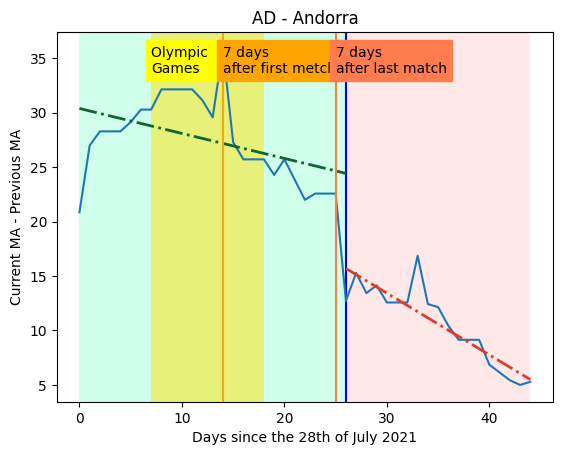

OUT [31]
values [1528.42857143 1528.71428571 1528.85714286 1535.28571429 1536.85714286
 1532.         1534.71428571 1531.42857143 1532.28571429 1531.
 1522.71428571 1522.57142857 1528.42857143 1528.14285714 1531.14285714
 1531.57142857 1531.42857143 1535.71428571 1534.42857143 1532.71428571
 1534.         1532.85714286 1526.85714286 1526.85714286 1528.
 1512.42857143 1481.57142857 1451.         1417.85714286 1382.42857143
 1338.85714286 1290.42857143 1258.85714286 1228.57142857 1197.28571429
 1169.         1142.85714286 1122.14285714 1102.14285714 1086.
 1079.         1061.14285714 1046.         1033.71428571 1022.85714286]
 
-3.284 x + 1561   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]   range(0, 32)   #116530
 
-20.2 x + 1889   [31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(31, 45)   #DB3F29


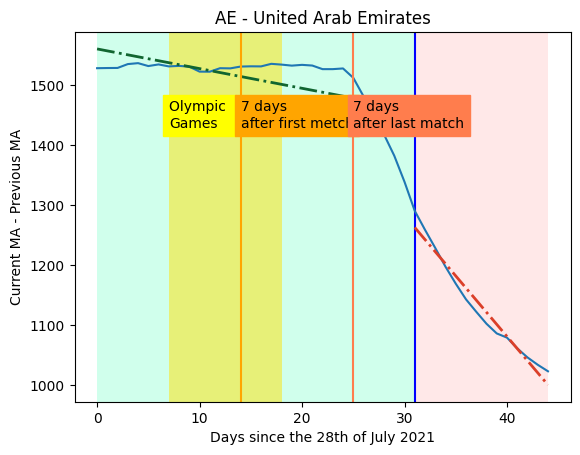

OUT [ 9 36]
values [1105.71428571 1066.42857143 1063.85714286 1003.42857143  978.
  932.14285714  874.14285714  761.42857143  626.85714286  491.71428571
  467.          398.          370.57142857  398.57142857  401.85714286
  440.57142857  498.28571429  518.57142857  528.57142857  509.14285714
  483.          480.71428571  469.57142857  440.85714286  422.42857143
  399.          348.71428571  336.85714286  314.57142857  280.
  243.          225.          194.85714286  175.71428571  153.14285714
  121.14285714   96.85714286   79.42857143   68.28571429   63.
   59.57142857   51.28571429   58.71428571   73.14285714   72.85714286]
 
-54.69 x + 1153   [0 1 2 3 4 5 6 7 8 9]   range(0, 10)   #116530
 
-12.19 x + 642.6   [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36]   range(9, 37)   #D7A449
 
-2.429 x + 166.4   [36 37 38 39 40 41 42 43 44]   range(36, 45)   #DB3F29


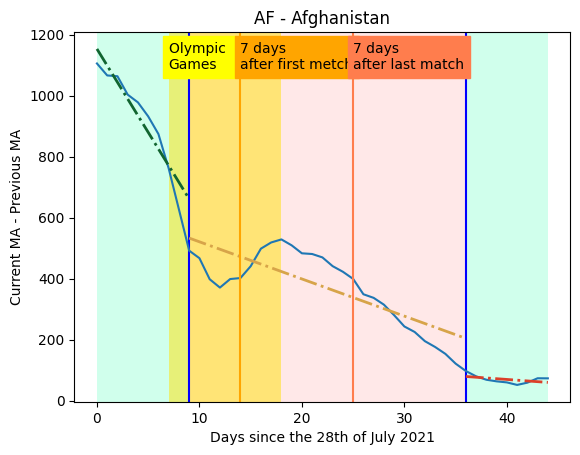

OUT [24]
values [ 0.14285714  0.28571429  0.28571429  0.28571429  0.28571429  0.28571429
  1.28571429  1.28571429  1.42857143  1.42857143  1.71428571  1.71428571
  1.71428571  1.85714286  1.85714286  2.57142857  3.57142857  3.28571429
  3.28571429  3.28571429  2.14285714  3.28571429  2.28571429  2.42857143
  3.57142857  5.          6.42857143  6.42857143  5.28571429  8.71428571
  7.42857143  6.28571429  4.85714286  7.          7.         10.42857143
  7.         10.71428571 16.85714286 16.85714286 13.28571429 20.42857143
 17.         25.28571429 21.57142857]
 
0.1393 x + 0.1486   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]   range(0, 25)   #116530
 
0.8994 x - 19.75   [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(24, 45)   #DB3F29


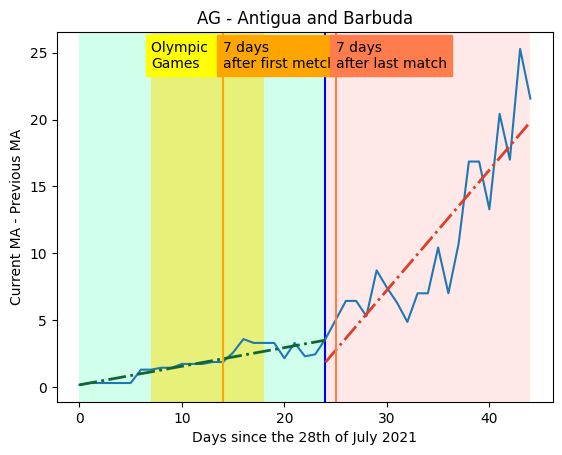

OUT [16]
values [0.14285714 0.14285714 0.14285714 0.28571429 0.28571429 0.28571429
 0.28571429 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 1.85714286
 1.85714286 1.85714286 1.85714286 3.28571429 3.28571429 3.28571429
 3.85714286 3.85714286 3.85714286 5.57142857 4.14285714 4.14285714
 5.28571429 5.71428571 5.71428571]
 
-0.005042 x + 0.2164   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
0.2973 x - 3.63   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]   range(16, 33)   #DB3F29


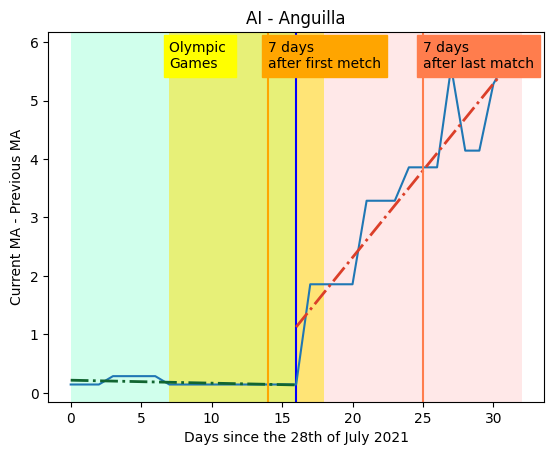

OUT [21]
values [  9.14285714   8.42857143   9.14285714   9.57142857  11.14285714
  13.42857143  14.28571429  18.85714286  21.          24.
  25.85714286  26.85714286  27.          27.71428571  26.
  27.          28.85714286  29.71428571  32.57142857  35.14285714
  36.42857143  41.28571429  51.14285714  63.28571429  79.28571429
  92.71428571 113.         119.28571429 141.42857143 168.14285714
 188.42857143 221.28571429 260.         290.71428571 309.42857143
 342.42857143 369.71428571 405.14285714 427.42857143 462.85714286
 482.42857143 510.57142857 560.42857143 612.85714286 665.14285714]
 
1.434 x + 7.667   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]   range(0, 22)   #116530
 
26.76 x - 579   [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(21, 45)   #DB3F29


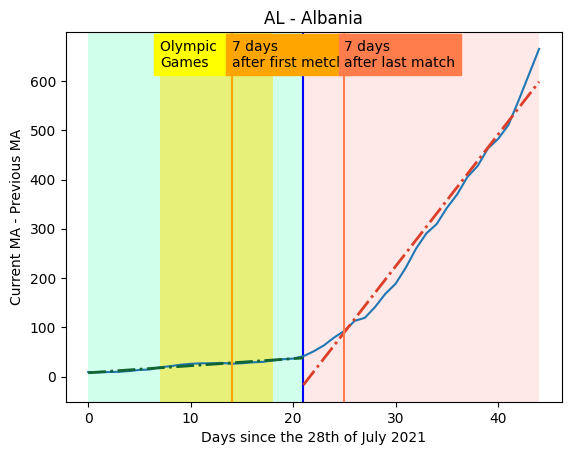

OUT [27]
values [137.42857143 139.42857143 144.71428571 148.85714286 151.85714286
 159.85714286 164.28571429 173.14285714 181.57142857 190.57142857
 195.42857143 198.28571429 196.28571429 204.85714286 206.
 212.14285714 211.14285714 220.14285714 223.71428571 231.85714286
 231.85714286 245.57142857 251.14285714 259.         259.71428571
 260.14285714 271.         286.85714286 296.85714286 310.28571429
 329.14285714 343.         359.57142857 365.85714286 382.
 404.85714286 420.71428571 431.71428571 439.42857143 438.71428571
 464.42857143 483.         500.71428571 502.71428571 529.14285714]
 
5.11 x + 136.2   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
13.99 x - 91.63   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(27, 45)   #DB3F29


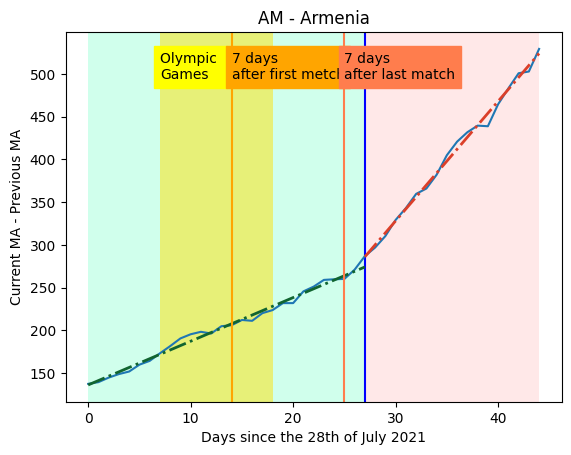

OUT [34]
values [119.42857143 133.85714286 120.         118.         121.
 121.57142857 131.85714286 128.57142857 125.         142.57142857
 147.         139.28571429 139.         149.85714286 151.57142857
 154.42857143 145.28571429 148.71428571 147.85714286 148.71428571
 130.         124.28571429 111.85714286 120.42857143 116.42857143
 121.         118.14285714 124.28571429 120.         129.28571429
 119.85714286 134.42857143 136.42857143 140.57142857 153.42857143
 168.14285714 164.42857143 179.28571429 183.42857143 189.71428571
 192.14285714 196.57142857 194.85714286 199.71428571 192.28571429]
 
-0.05339 x + 132.7   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
4.138 x + 21.72   [34 35 36 37 38 39 40 41 42 43 44]   range(34, 45)   #DB3F29


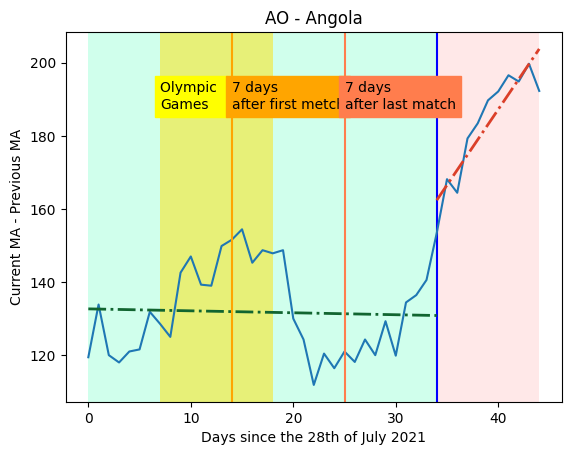

OUT [30]
values [14768.85714286 15477.57142857 15242.28571429 15015.71428571
 14452.         13669.57142857 13122.71428571 12811.28571429
 12522.42857143 12510.14285714 12621.14285714 12872.14285714
 13109.28571429 13011.14285714 12878.         12818.42857143
 12622.28571429 12460.71428571 12048.57142857 11743.28571429
 11716.57142857 11611.57142857 11579.42857143 11544.42857143
 11491.         11227.71428571 10902.71428571 10450.14285714
 10220.85714286  9625.28571429  9188.85714286  8900.85714286
  7710.14285714  7461.28571429  7280.85714286  7057.42857143
  6878.57142857  6807.42857143  6750.57142857  7292.28571429
  6974.85714286  6505.          6104.71428571  5750.14285714
  5579.14285714]
 
-155.4 x + 1.479e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
-202.1 x + 1.456e+04   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


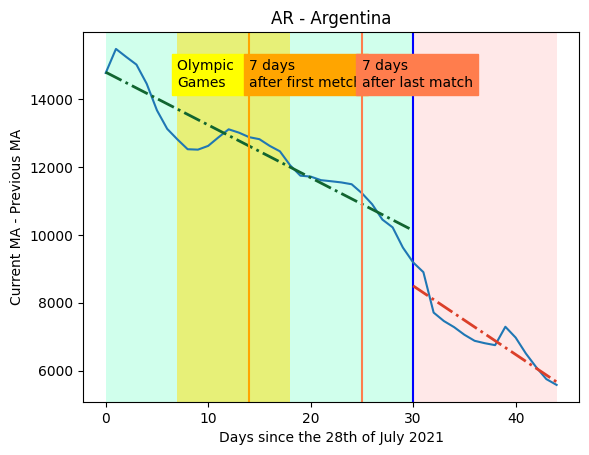

OUT [28]
values [ 197.14285714  219.14285714  241.14285714  277.14285714  303.14285714
  314.71428571  327.57142857  340.42857143  357.14285714  367.
  354.42857143  352.85714286  360.14285714  364.42857143  390.71428571
  403.14285714  419.          447.71428571  461.28571429  465.57142857
  470.85714286  477.71428571  476.42857143  486.28571429  490.42857143
  510.85714286  523.71428571  554.42857143  594.28571429  646.
  698.42857143  752.71428571  791.14285714  842.71428571  879.85714286
  928.28571429  990.14285714 1039.14285714 1087.         1126.
 1152.57142857 1192.28571429 1250.42857143 1273.         1286.28571429]
 
11.3 x + 238.6   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
44.74 x - 638.4   [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(28, 45)   #DB3F29


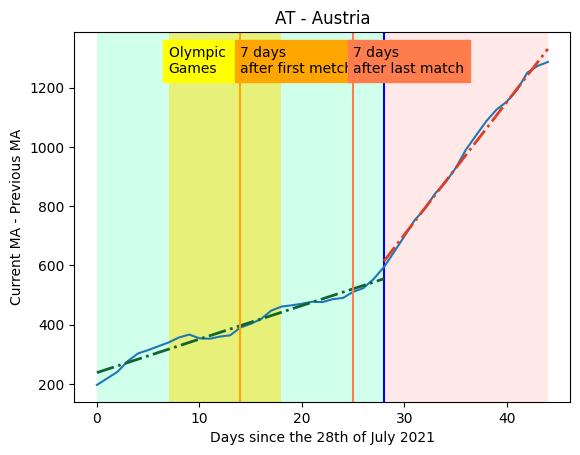

OUT [30]
values [ 78.42857143  78.42857143  78.42857143 125.         125.
 125.         125.         125.         125.         125.
 180.         180.         180.         180.         180.
 180.         180.         238.14285714 238.14285714 238.14285714
 238.14285714 238.14285714 238.14285714 238.14285714 330.42857143
 330.42857143 330.42857143 330.42857143 330.42857143 330.42857143
 330.42857143 516.14285714 516.14285714 516.14285714 516.14285714
 516.14285714 516.14285714 516.14285714 876.14285714 876.14285714
 876.14285714 876.14285714 876.14285714 876.14285714 876.14285714]
 
9.101 x + 68.69   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
40.64 x - 832   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


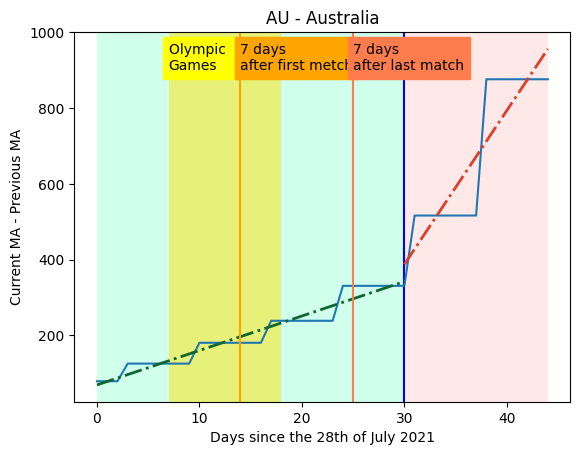

OUT [12]
values [  4.71428571   3.42857143   5.28571429   5.28571429   5.28571429
   9.28571429   8.14285714  11.28571429  12.28571429  13.42857143
  13.42857143  13.42857143  13.          24.42857143  29.14285714
  35.71428571  41.71428571  41.71428571  41.71428571  62.85714286
  57.42857143  59.57142857  68.42857143  77.71428571  77.71428571
  77.71428571  98.57142857 103.14285714 108.42857143 113.
 114.42857143 114.42857143 114.42857143 127.85714286 125.28571429
 125.         118.57142857 112.85714286 112.85714286 112.85714286
  93.28571429  93.42857143  91.71428571  87.14285714  85.57142857]
 
1.03 x + 3.106   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
2.717 x + 7.619   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44]   range(12, 45)   #DB3F29


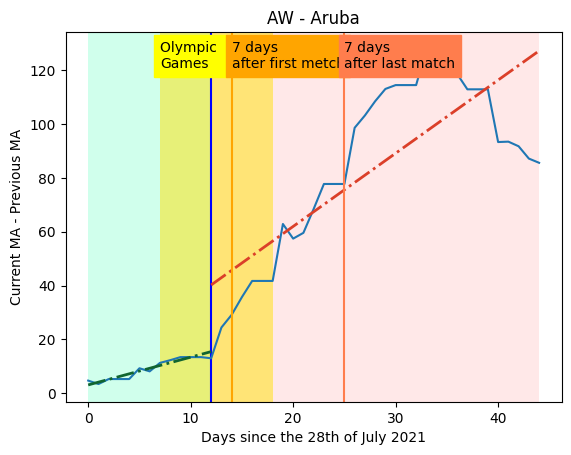

OUT [13]
values [ 131.14285714  144.71428571  144.          155.          169.14285714
  180.42857143  197.28571429  208.57142857  210.42857143  239.28571429
  267.71428571  286.42857143  304.14285714  335.14285714  410.14285714
  467.71428571  510.14285714  541.71428571  582.42857143  605.14285714
  671.28571429  706.42857143  789.42857143  871.42857143  965.14285714
 1043.57142857 1139.28571429 1254.28571429 1454.28571429 1665.42857143
 1740.71428571 2057.71428571 2311.         2418.14285714 2644.71428571
 2892.28571429 3026.57142857 3340.71428571 3346.85714286 3357.71428571
 3514.         3551.28571429 3503.42857143 3517.71428571 3551.28571429]
 
14.31 x + 117.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
125 x - 1724   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


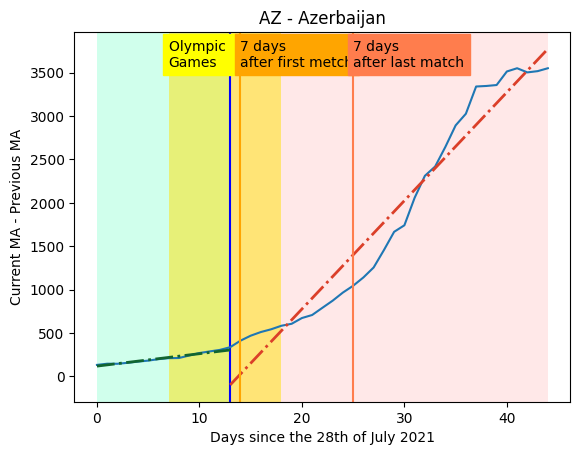

OUT [13]
values [ 17.85714286  19.57142857  20.          19.          20.14285714
  18.85714286  18.          15.28571429  16.71428571  19.28571429
  22.57142857  24.42857143  26.          26.14285714  31.57142857
  32.28571429  33.57142857  37.57142857  38.28571429  41.42857143
  43.14285714  54.71428571  60.14285714  64.42857143  70.57142857
  74.57142857  76.          93.         100.85714286 114.85714286
 138.57142857 160.         176.57142857 179.14285714 195.85714286
 230.28571429 258.42857143 285.28571429 313.85714286 324.85714286
 334.         370.71428571 398.85714286 435.         461.85714286]
 
0.4058 x + 17.39   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
13.68 x - 225.6   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


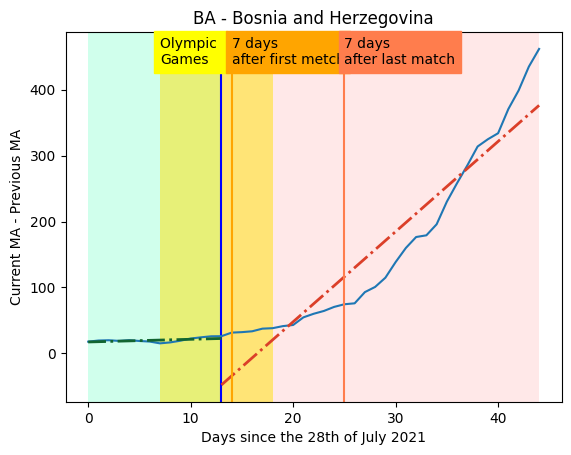

OUT [33]
values [12.57142857 15.         15.85714286 15.         16.42857143 11.71428571
 11.85714286 13.71428571 12.71428571 12.71428571 12.71428571 12.57142857
 12.42857143 12.          9.57142857  8.85714286  6.57142857  7.
  7.28571429  8.85714286  9.14285714  9.          9.85714286 11.14285714
 10.85714286 10.57142857  9.14285714  9.          9.          9.
  9.42857143  8.57142857  8.71428571 11.         14.42857143 13.71428571
 14.         14.28571429 16.14285714 16.42857143 14.85714286 12.42857143
 16.14285714 18.         18.85714286]
 
-0.1973 x + 14.03   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]   range(0, 34)   #116530
 
0.4535 x - 2.438   [33 34 35 36 37 38 39 40 41 42 43 44]   range(33, 45)   #DB3F29


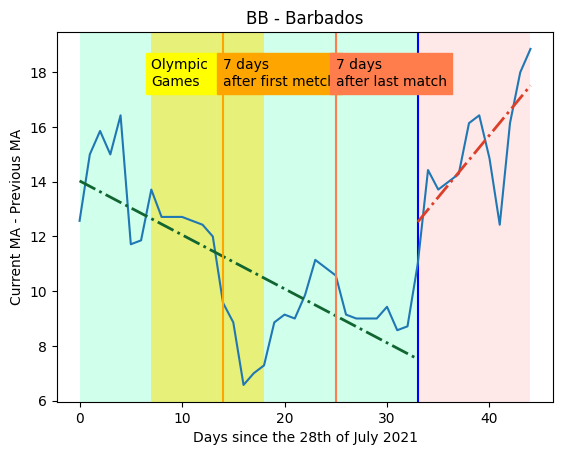

OUT [32]
values [11793.57142857 11911.28571429 11870.85714286 11828.57142857
 11764.71428571 11676.28571429 10995.          9775.14285714
  8948.85714286  8704.71428571  8663.71428571  8931.
  9409.         10639.85714286 12293.28571429 13364.42857143
 13734.28571429 14241.85714286 14355.71428571 14477.28571429
 14132.57142857 13771.57142857 13592.14285714 13416.
 12766.71428571 12120.14285714 11461.28571429 10976.
 10602.         10010.42857143  9831.71428571  9315.28571429
  8671.85714286  8153.42857143  7700.28571429  7191.71428571
  6838.57142857  6425.14285714  6156.57142857  5979.14285714
  5652.57142857  5326.57142857  5059.71428571  4707.14285714
  4627.85714286]
 
22.98 x + 1.125e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]   range(0, 33)   #116530
 
-332.3 x + 1.897e+04   [32 33 34 35 36 37 38 39 40 41 42 43 44]   range(32, 45)   #DB3F29


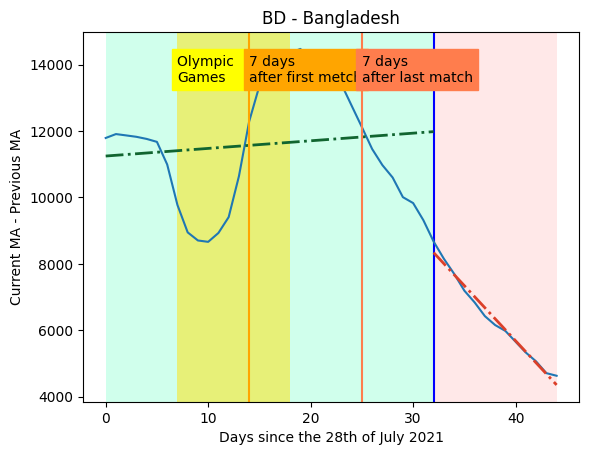

OUT [20]
values [1238.28571429 1277.28571429 1300.57142857 1340.57142857 1355.
 1363.14285714 1415.85714286 1491.         1397.         1471.85714286
 1484.14285714 1491.71428571 1484.         1481.14285714 1430.42857143
 1568.14285714 1549.28571429 1569.28571429 1573.42857143 1612.28571429
 1632.14285714 1682.         1699.42857143 1707.14285714 1755.14285714
 1767.85714286 1748.85714286 1798.14285714 1836.57142857 1853.42857143
 1899.42857143 1919.42857143 1930.28571429 1907.85714286 1941.14285714
 1945.42857143 1984.71428571 1963.         1959.         1949.42857143
 1976.57142857 1951.57142857 1981.85714286 2000.14285714 2025.85714286]
 
16.96 x + 1284   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]   range(0, 21)   #116530
 
14.86 x + 1397   [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44]   range(20, 45)   #DB3F29


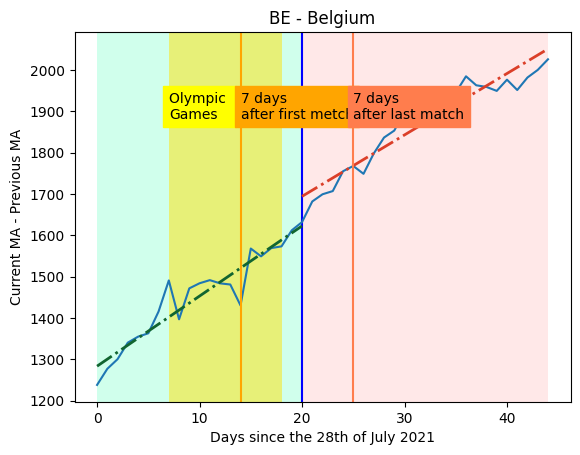

OUT [14]
values [3.57142857 3.71428571 3.85714286 2.71428571 2.28571429 2.
 1.42857143 1.         0.85714286 0.71428571 1.         2.
 2.71428571 3.28571429 4.14285714 5.         5.57142857 6.42857143
 5.85714286 6.14285714 5.57142857 5.85714286 5.28571429 5.85714286
 5.28571429 5.         4.71428571 5.14285714 8.71428571 8.71428571
 7.71428571 7.42857143 7.28571429 6.85714286 7.85714286 3.85714286
 4.         5.42857143 5.42857143 6.85714286 8.14285714 8.42857143
 8.42857143 8.57142857 6.57142857]
 
-0.1212 x + 3.012   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
0.07488 x + 4.156   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44]   range(14, 45)   #DB3F29


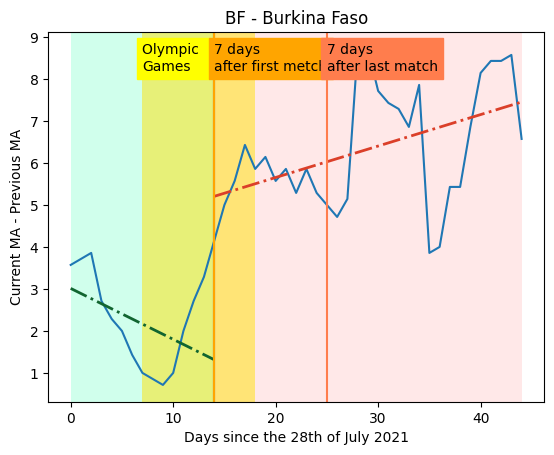

OUT [16]
values [  58.85714286   58.85714286   58.85714286   69.14285714   69.14285714
   69.14285714   69.14285714   69.14285714   69.14285714   69.14285714
   99.85714286   99.85714286   99.85714286   99.85714286   99.85714286
   99.85714286   99.85714286  203.57142857  203.57142857  203.57142857
  203.57142857  203.57142857  203.57142857  203.57142857  402.71428571
  402.71428571  402.71428571  402.71428571  402.71428571  402.71428571
  402.71428571  727.          727.          727.          727.
  727.          727.          727.         1135.57142857 1135.57142857
 1135.57142857 1135.57142857 1135.57142857 1135.57142857 1135.57142857]
 
3.3 x + 53.98   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
41.23 x - 637.4   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]   range(16, 45)   #DB3F29


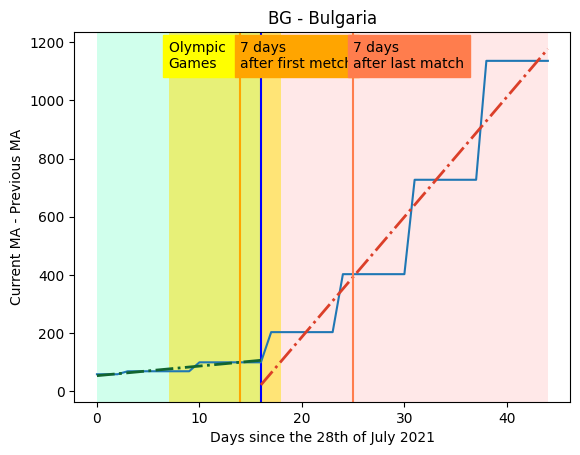

OUT [13]
values [101.14285714 100.          98.42857143  97.71428571  95.71428571
  89.28571429  89.57142857  83.85714286  86.57142857  87.28571429
  88.14285714  94.14285714  96.71428571 100.57142857 107.71428571
 107.         106.         110.42857143 108.85714286 110.71428571
 109.14285714 110.14285714 109.         109.71428571 109.
 108.14285714 108.57142857 113.57142857 119.14285714 121.85714286
 120.57142857 123.85714286 122.71428571 123.42857143 120.
 115.14285714 109.         105.71428571 102.57142857 101.71428571
  98.57142857  96.14285714  96.57142857  98.42857143 102.28571429]
 
-0.8352 x + 97.98   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
-0.1598 x + 114.1   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


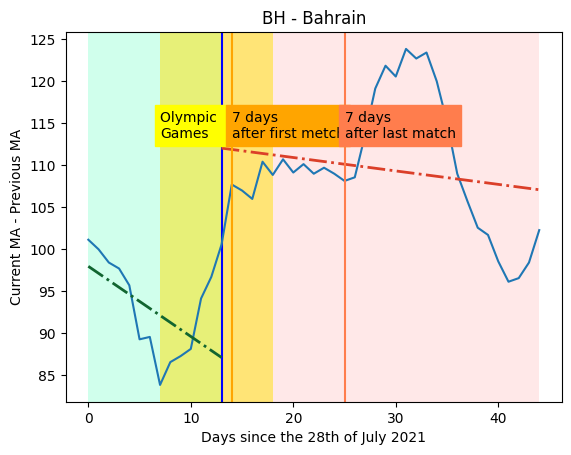

OUT [7]
values [ 27.71428571  26.85714286  29.          29.71428571  33.71428571
  39.          36.28571429  46.57142857  60.14285714  78.57142857
  97.          91.71428571 102.71428571 121.         136.
 144.71428571 136.14285714 133.14285714 133.42857143 142.71428571
 152.28571429 144.         154.71428571 184.28571429 185.
 236.71428571 208.71428571 211.         218.85714286 214.85714286
 192.         186.14285714 146.14285714 168.57142857 173.28571429
 167.28571429 161.14285714 178.28571429 175.71428571 169.
 177.71428571 171.         171.85714286 175.71428571 162.28571429]
 
1.954 x + 25.89   [0 1 2 3 4 5 6 7]   range(0, 8)   #116530
 
2.622 x + 88.68   [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(7, 45)   #DB3F29


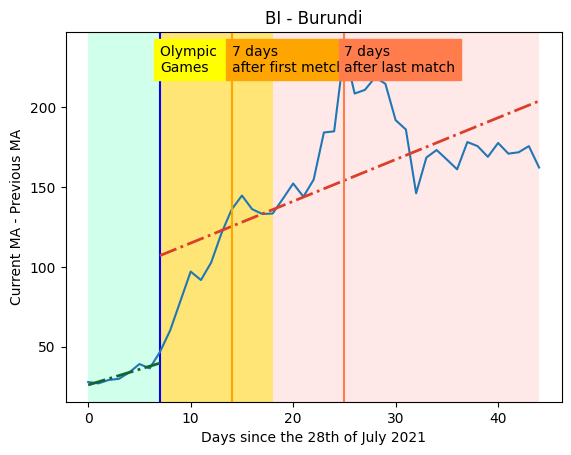

OUT [ 4 28]
values [  2.42857143   2.42857143   2.42857143   2.42857143   2.42857143
  11.42857143  11.42857143  11.42857143  11.42857143  21.42857143
  21.42857143  21.42857143  10.          10.          10.
  10.          30.57142857  30.57142857  30.57142857  30.57142857
  30.57142857  30.57142857  30.57142857  65.28571429  65.28571429
  65.28571429  65.28571429  65.28571429  65.28571429 225.
 159.71428571 159.71428571 159.71428571 159.71428571 159.71428571
 159.71428571 329.85714286 329.85714286 329.85714286 329.85714286
 329.85714286]
 
-2.416e-16 x + 2.429   [0 1 2 3 4]   range(0, 5)   #116530
 
2.589 x - 11.26   [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28]   range(4, 29)   #D7A449
 
20.02 x - 457.6   [28 29 30 31 32 33 34 35 36 37 38 39 40]   range(28, 41)   #DB3F29


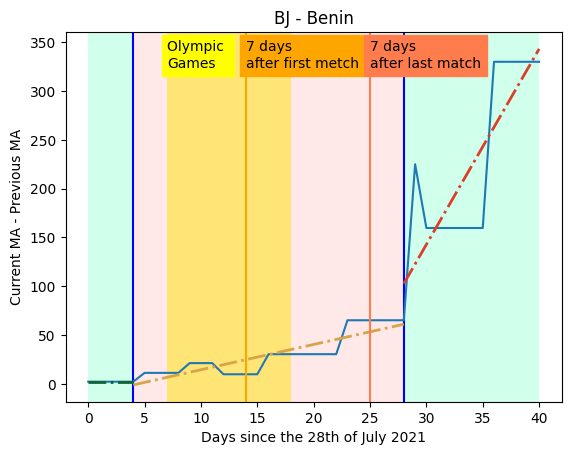

OUT [15]
values [ 0.85714286  0.85714286  1.57142857  0.71428571  0.71428571  0.71428571
  0.71428571  0.71428571  0.71428571  1.14285714  1.14285714  1.14285714
  1.14285714  1.14285714  1.14285714  1.14285714 38.57142857 38.57142857
 38.57142857 38.57142857 38.57142857 38.57142857 38.57142857  9.14285714
  9.14285714 16.85714286 16.85714286 16.85714286 16.85714286 20.57142857
 11.42857143 11.42857143 11.28571429 11.28571429 11.28571429 11.28571429
 10.57142857 10.57142857 10.57142857  3.          3.          3.
  3.          5.57142857]
 
0.01939 x + 0.8262   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-1.122 x + 49.6   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43]   range(15, 44)   #DB3F29


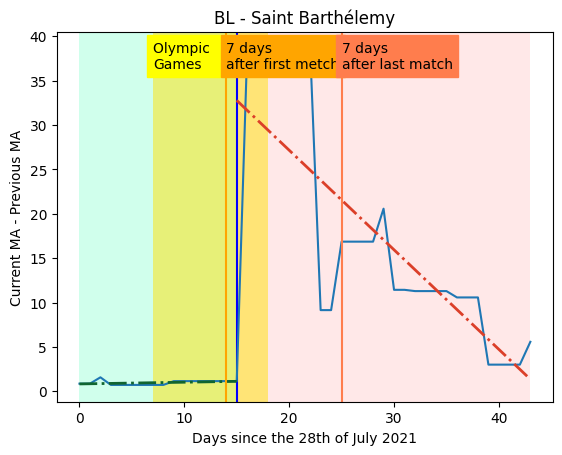

OUT [13]
values [ 0.57142857  0.85714286  0.85714286  1.28571429  1.42857143  1.57142857
  1.85714286  1.42857143  1.14285714  1.42857143  1.14285714  1.
  0.85714286  0.57142857  2.57142857  2.57142857  2.28571429  4.28571429
  4.28571429  4.28571429  6.85714286  5.14285714  6.14285714  7.57142857
  6.57142857  6.57142857  6.57142857  4.          8.          8.14285714
  8.14285714  8.71428571  8.71428571  8.71428571 12.          7.57142857
 10.28571429 10.57142857 10.71428571 10.71428571 10.71428571 13.14285714
 13.42857143 11.85714286 12.57142857]
 
0.01805 x + 1.078   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
0.3438 x - 2.166   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


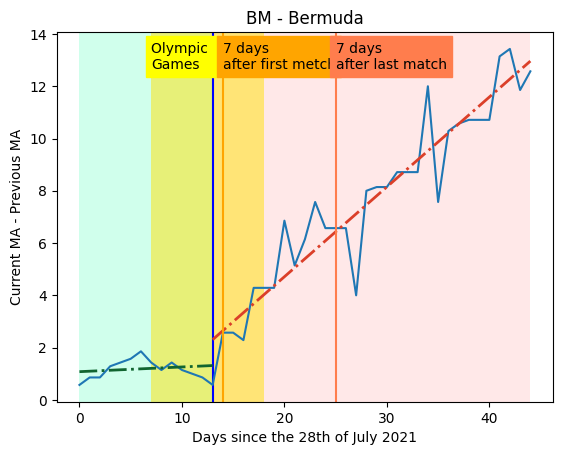

OUT [24]
values [  2.28571429   2.42857143   2.14285714   2.28571429   4.
   3.85714286   3.85714286   4.14285714   4.28571429   5.42857143
   4.28571429   4.           3.42857143   3.42857143   3.14285714
   3.28571429   2.28571429   2.42857143   0.71428571   0.85714286
   0.85714286   0.85714286   0.42857143   1.42857143   3.71428571
   9.71428571  14.42857143  22.14285714  29.14285714  37.
  41.85714286  51.28571429  54.42857143  58.85714286  64.57142857
  84.71428571 105.         116.42857143 149.42857143 155.14285714
 161.57142857 173.28571429 161.28571429 149.57142857 143.85714286]
 
-0.1098 x + 4.018   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]   range(0, 25)   #116530
 
9.131 x - 225.3   [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(24, 45)   #DB3F29


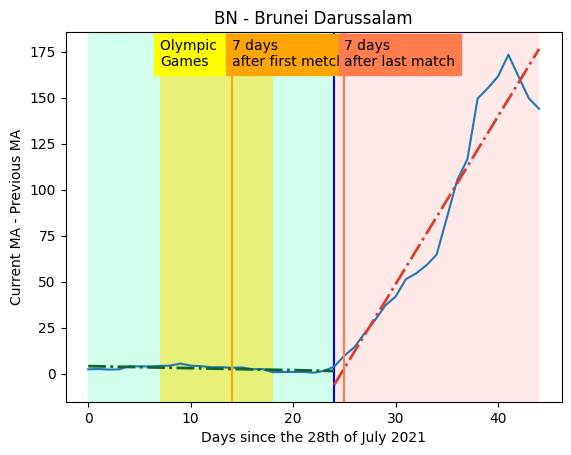

OUT [21]
values [1228.85714286 1217.85714286 1193.57142857 1163.14285714 1159.85714286
 1130.42857143 1098.42857143 1051.71428571 1019.85714286  962.71428571
  932.14285714  894.42857143  895.57142857  865.28571429  835.28571429
  796.85714286  805.71428571  781.42857143  790.14285714  782.28571429
  765.14285714  748.71428571  738.28571429  691.          635.57142857
  598.57142857  594.85714286  590.42857143  599.14285714  590.28571429
  593.          624.14285714  633.57142857  623.57142857  622.
  610.28571429  602.42857143  605.42857143  613.57142857  609.
  602.14285714  586.57142857  570.          565.28571429  535.57142857]
 
-26.21 x + 1232   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]   range(0, 22)   #116530
 
-4.767 x + 770.9   [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(21, 45)   #DB3F29


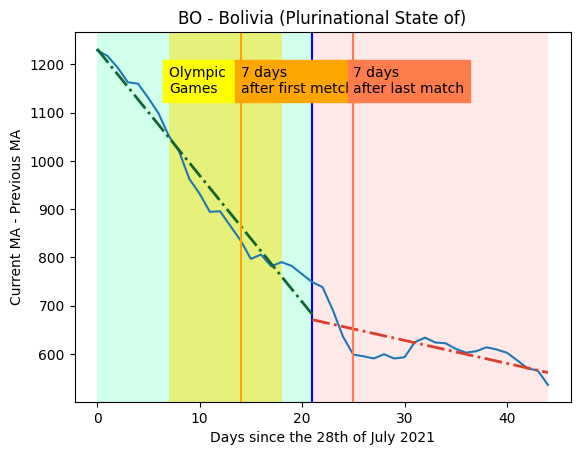

OUT [17]
values [42425.42857143 42956.         42822.28571429 41087.14285714
 39063.57142857 40947.71428571 40696.28571429 38206.28571429
 37746.42857143 37313.28571429 46333.42857143 46869.42857143
 44584.14285714 45116.71428571 47090.85714286 46161.71428571
 45094.         35404.28571429 35331.57142857 35670.71428571
 35119.85714286 33820.57142857 32778.14285714 32459.71428571
 32639.         33417.71428571 32473.42857143 32036.57142857
 32403.57142857 31221.71428571 31211.42857143 30036.28571429
 28337.57142857 28346.71428571 28687.57142857 29077.28571429
 30401.71428571 29877.85714286 29871.28571429 29477.85714286
 29541.71428571 29346.28571429 28383.28571429 26805.71428571
 26049.85714286]
 
342.6 x + 3.988e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-296.7 x + 4.013e+04   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44]   range(17, 45)   #DB3F29


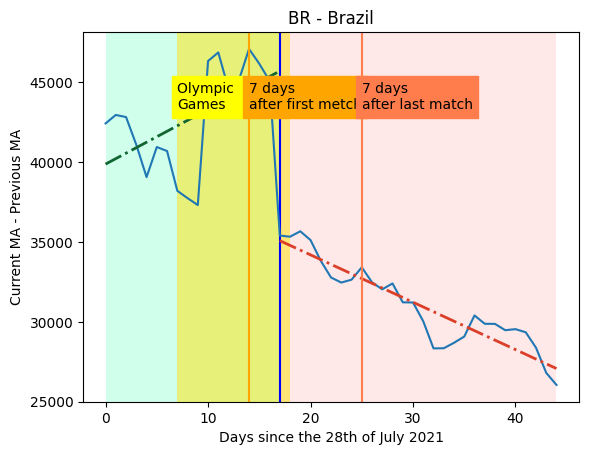

OUT [12]
values [ 44.14285714  44.42857143  48.42857143  50.28571429  57.28571429
  54.85714286  64.57142857  72.42857143  73.14285714  79.
  84.42857143  79.          92.57142857  91.71428571  96.57142857
  99.71428571 102.85714286 111.85714286 114.42857143 108.42857143
 102.71428571  95.28571429  92.28571429 106.          99.57142857
 100.71428571 111.85714286 124.14285714 126.71428571 135.71428571
 121.85714286 127.57142857 130.28571429 124.85714286 115.42857143
 119.57142857 117.28571429 122.28571429 121.14285714 121.28571429
 125.28571429 127.42857143 124.14285714 130.85714286 116.        ]
 
3.94 x + 41   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
1.012 x + 85.56   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44]   range(12, 45)   #DB3F29


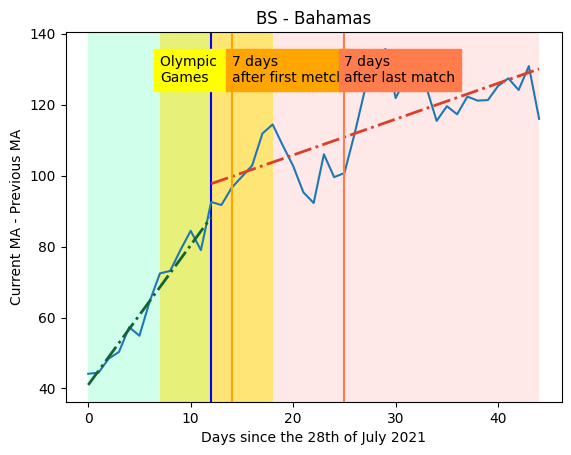

OUT [36]
values [18.28571429 20.         20.71428571 20.85714286 19.57142857 18.71428571
 12.28571429 11.14285714 10.28571429 10.14285714  9.28571429  8.85714286
  6.42857143  6.42857143  6.85714286  5.42857143  4.71428571  4.57142857
  5.          4.57142857  5.57142857  5.28571429  5.14285714  4.14285714
  3.71428571  3.14285714  2.57142857  1.57142857  1.42857143  3.14285714
  3.71428571  3.85714286  4.42857143  3.85714286  3.71428571  3.85714286
  2.          2.14285714  2.          1.14285714  2.          2.
  1.57142857  1.71428571  1.28571429]
 
-0.4833 x + 16.33   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]   range(0, 37)   #116530
 
-0.06905 x + 4.524   [36 37 38 39 40 41 42 43 44]   range(36, 45)   #DB3F29


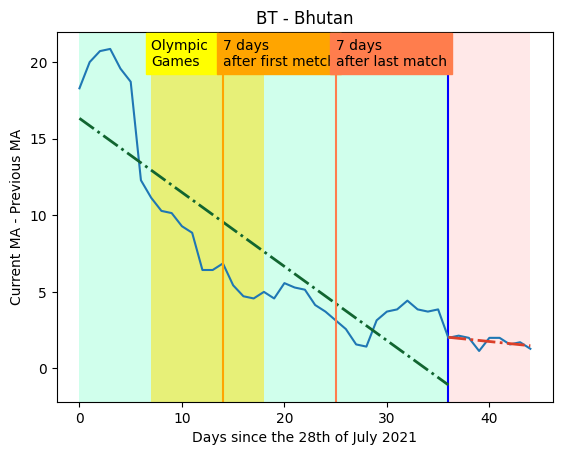

OUT [34]
values [1535.         1535.         1678.42857143 1678.42857143 1678.42857143
 1646.28571429 1646.28571429 1646.28571429 1646.28571429 1460.28571429
 1460.28571429 1460.28571429 1290.42857143 1290.42857143 1290.42857143
 1290.42857143 1870.85714286 1870.85714286 1870.85714286 2269.14285714
 2269.14285714 2269.14285714 2269.14285714 2221.57142857 2221.57142857
 2221.57142857 1171.         2026.28571429 2026.28571429 2026.28571429
 1658.42857143 1658.42857143 1658.42857143 2241.42857143 1386.14285714
 1386.14285714 1386.14285714 1208.85714286 1208.85714286 1208.85714286
 1047.42857143 1047.42857143 1047.42857143 1047.42857143  869.28571429]
 
16 x + 1502   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
-49.45 x + 3096   [34 35 36 37 38 39 40 41 42 43 44]   range(34, 45)   #DB3F29


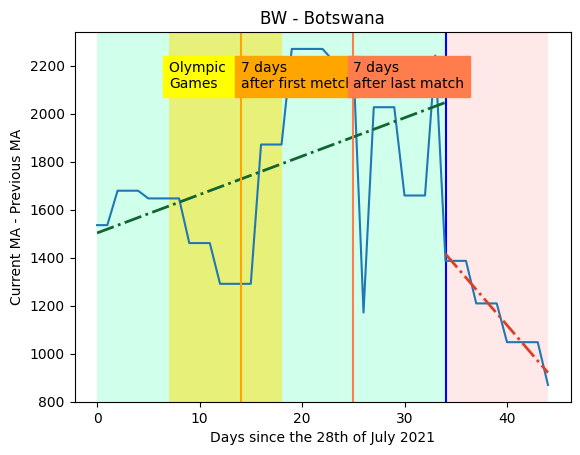

OUT [35]
values [ 943.14285714  936.85714286  940.57142857  931.85714286  922.28571429
  917.85714286  919.85714286  924.85714286  936.          911.28571429
  917.          906.57142857  905.14285714  894.42857143  890.85714286
  885.71428571  897.28571429  887.42857143  898.57142857  914.
  922.          924.42857143  940.14285714  956.          987.57142857
  990.57142857  988.57142857  992.28571429  992.14285714  996.71428571
 1015.28571429 1006.42857143 1053.         1074.71428571 1073.28571429
 1086.85714286 1112.57142857 1157.28571429 1202.42857143 1202.
 1205.42857143 1243.         1285.28571429 1313.28571429 1331.        ]
 
3.674 x + 886   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]   range(0, 36)   #116530
 
26.47 x + 168.4   [35 36 37 38 39 40 41 42 43 44]   range(35, 45)   #DB3F29


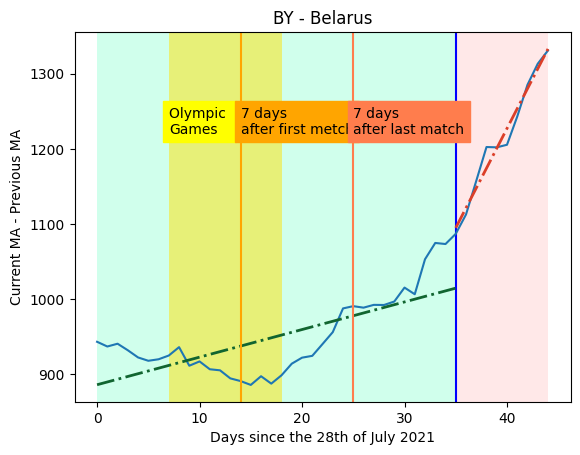

OUT [29]
values [25.42857143 24.14285714 24.         23.57142857 23.57142857 23.57142857
 30.14285714 32.71428571 36.         35.57142857 33.42857143 33.42857143
 33.42857143 30.14285714 23.85714286 29.14285714 31.57142857 35.14285714
 35.14285714 35.14285714 25.71428571 43.         37.42857143 38.28571429
 39.28571429 39.28571429 39.28571429 48.         42.         48.71428571
 50.85714286 58.42857143 58.42857143 58.42857143 73.         75.71428571
 72.85714286 85.14285714 81.14285714 81.14285714 81.14285714 78.
 82.14285714 87.28571429 79.85714286]
 
0.6215 x + 24.11   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]   range(0, 30)   #116530
 
2.362 x - 14.19   [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(29, 45)   #DB3F29


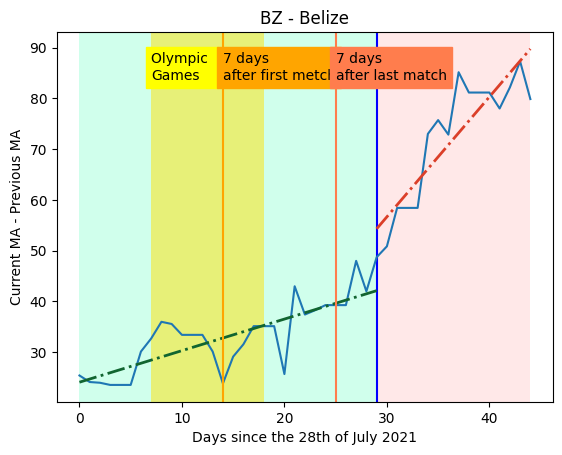

OUT [15]
values [ 480.71428571  456.          435.71428571  382.42857143  380.85714286
  384.14285714  383.14285714  383.57142857  386.28571429  407.
  438.57142857  458.14285714  483.42857143  507.85714286  542.
  594.14285714  640.42857143  681.71428571  717.71428571  776.42857143
  814.28571429  837.          864.57142857  943.57142857 1031.14285714
 1116.57142857 1220.         1292.57142857 1379.57142857 1508.57142857
 1607.71428571 1735.71428571 1863.14285714 1873.85714286 1983.85714286
 2045.85714286 2125.42857143 2209.85714286 2287.85714286 2376.28571429
 2513.14285714 2524.42857143 2603.42857143 2733.14285714 2823.42857143]
 
5.37 x + 396.4   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
81.13 x - 802.4   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44]   range(15, 45)   #DB3F29


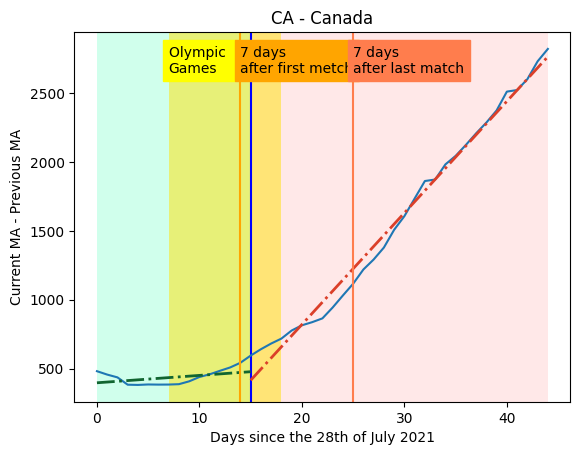

OUT [31]
values [268.28571429 247.42857143 208.         267.14285714 289.14285714
 316.14285714 279.57142857 280.42857143 282.57142857 337.14285714
 302.71428571 306.71428571 291.85714286 300.57142857 296.71428571
 308.28571429 304.42857143 269.85714286 241.42857143 251.57142857
 260.42857143 256.71428571 241.71428571 229.42857143 267.42857143
 256.         251.85714286 234.14285714 197.71428571 245.28571429
 230.42857143 195.         194.42857143 172.71428571 169.71428571
 189.28571429 132.57142857 124.71428571 126.14285714 125.71428571
 143.85714286 140.42857143 120.85714286 137.71428571 122.        ]
 
-1.638 x + 293   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]   range(0, 32)   #116530
 
-5.474 x + 354.9   [31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(31, 45)   #DB3F29


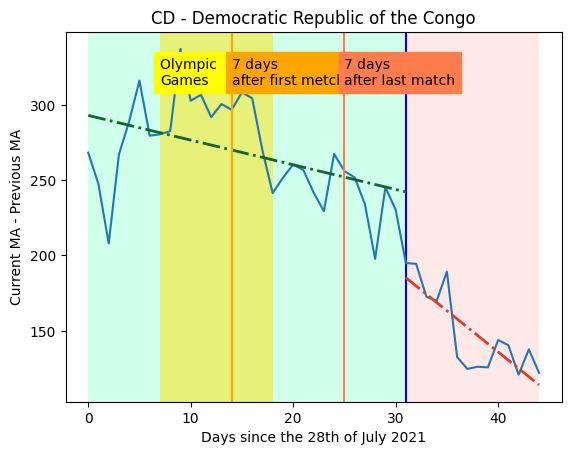

OUT [33]
values [ 1.85714286  3.71428571  4.          3.85714286  3.85714286  5.71428571
  6.85714286  7.42857143  6.42857143  5.85714286  6.14285714  6.14285714
  5.14285714  3.85714286  2.57142857  3.14285714  3.85714286  4.
  4.14285714  3.14285714  3.14285714  6.71428571  6.28571429  6.71428571
  7.57142857  7.85714286  9.         10.14285714  7.28571429  7.
  6.          5.14285714  4.71428571  4.          3.14285714  2.71428571
  2.          1.85714286  1.28571429  1.28571429  3.57142857  3.57142857
  3.28571429  3.71428571  5.        ]
 
0.08819 x + 4.022   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]   range(0, 34)   #116530
 
0.1159 x - 1.509   [33 34 35 36 37 38 39 40 41 42 43 44]   range(33, 45)   #DB3F29


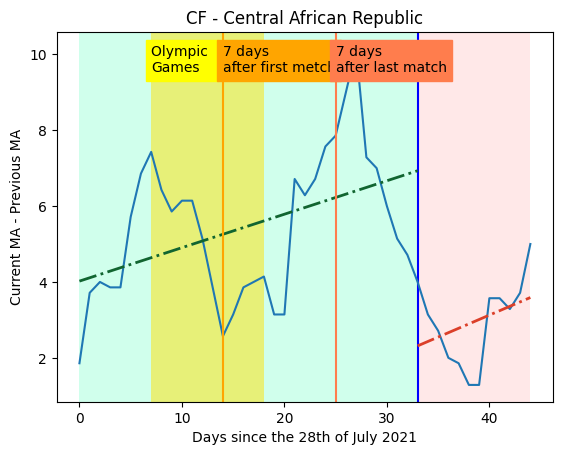

OUT [11]
values [20.14285714 16.71428571 16.71428571 16.71428571 16.71428571 17.
 17.         17.         15.14285714 15.14285714 15.14285714 15.14285714
  5.57142857  9.85714286  9.85714286  8.57142857  8.57142857  8.57142857
  8.57142857 14.42857143 10.14285714 10.14285714 11.         11.
 11.         11.         14.14285714 14.14285714 14.14285714 15.
 15.         15.         15.         14.14285714 14.14285714 14.14285714
 13.57142857 13.57142857 13.57142857 13.57142857 11.14285714 11.14285714
 11.14285714 13.57142857 13.57142857]
 
-0.3195 x + 18.27   [ 0  1  2  3  4  5  6  7  8  9 10 11]   range(0, 12)   #116530
 
0.1323 x + 8.513   [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44]   range(11, 45)   #DB3F29


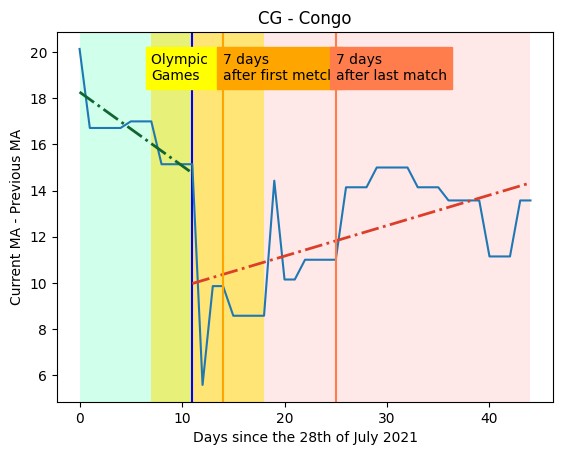

OUT [25]
values [ 401.28571429  445.14285714  490.57142857  519.          542.57142857
  583.42857143  614.42857143  655.          669.42857143  683.42857143
  695.42857143  707.57142857  721.          721.42857143  708.71428571
  717.          725.57142857  742.42857143  750.28571429  790.71428571
  826.42857143  867.14285714  915.42857143  965.42857143 1021.14285714
 1088.85714286 1244.         1392.57142857 1537.57142857 1687.14285714
 1837.85714286 1928.28571429 2020.         2253.         2368.42857143
 2457.71428571 2507.         2557.28571429 2567.14285714 2564.57142857
 2550.28571429 2561.42857143 2569.28571429 2595.28571429 2600.42857143]
 
19.91 x + 460.3   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]   range(0, 26)   #116530
 
80.22 x - 623.3   [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(25, 45)   #DB3F29


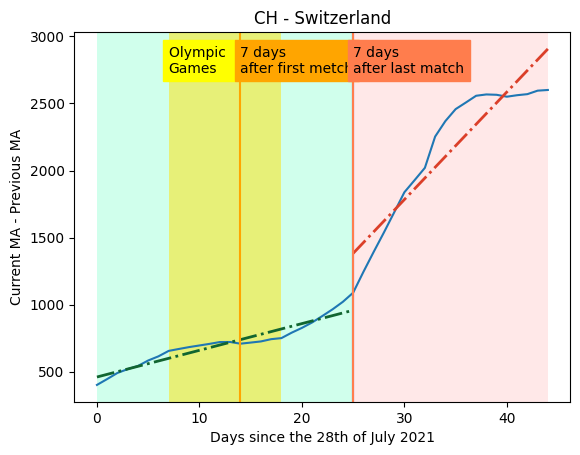

OUT [17]
values [ 38.          37.14285714  41.85714286  49.85714286  47.
  50.          55.          54.28571429  55.28571429  57.71428571
  61.28571429  56.57142857  61.14285714  58.71428571  62.28571429
  75.          75.85714286  83.          98.          99.14285714
 114.28571429 125.         140.28571429 146.28571429 151.85714286
 157.42857143 151.14285714 128.57142857 154.57142857 147.57142857
 158.28571429 143.42857143 117.42857143 120.57142857 169.14285714
 157.71428571 144.28571429 158.71428571 179.14285714 206.14285714
 212.42857143 172.         171.71428571 194.71428571 188.42857143]
 
2.027 x + 38.9   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
3.129 x + 54.27   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44]   range(17, 45)   #DB3F29


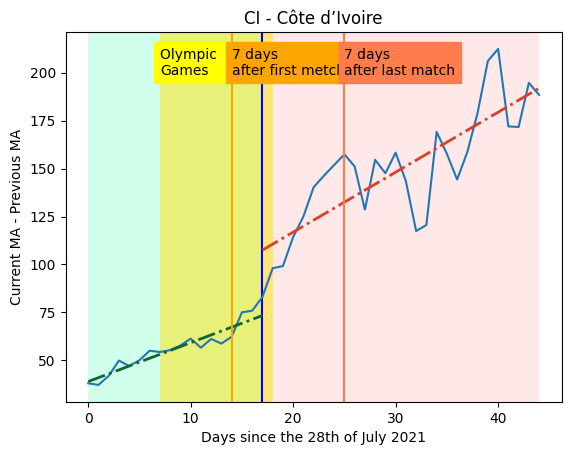

OUT [19]
values [2256.28571429 2129.28571429 2022.57142857 1903.         1771.57142857
 1608.57142857 1567.28571429 1532.         1459.57142857 1401.28571429
 1324.         1328.28571429 1351.71428571 1318.85714286 1294.71428571
 1225.         1181.57142857 1146.         1109.28571429 1072.42857143
 1052.42857143 1038.         1014.42857143  991.71428571  962.57142857
  917.28571429  923.42857143  909.42857143  896.14285714  886.42857143
  836.71428571  826.28571429  832.71428571  802.28571429  786.71428571
  767.85714286  727.85714286  716.14285714  694.28571429  660.57142857
  637.42857143  634.85714286  620.28571429  609.85714286  598.        ]
 
-57.68 x + 2042   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]   range(0, 20)   #116530
 
-19.45 x + 1436   [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44]   range(19, 45)   #DB3F29


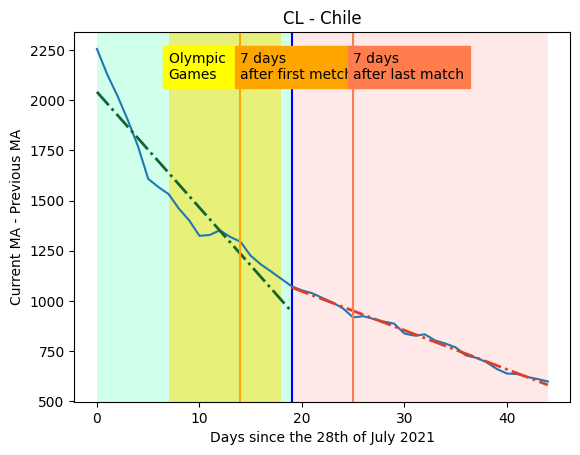

OUT [27]
values [ 57.71428571  57.71428571  57.71428571  57.71428571  57.71428571
  57.71428571  57.71428571  27.57142857  27.57142857  27.57142857
  27.57142857  27.57142857  27.57142857  27.57142857  55.71428571
  55.71428571  55.71428571  55.71428571  55.71428571  55.71428571
  55.71428571  51.28571429  51.28571429  51.28571429  51.28571429
  51.28571429  51.28571429  51.28571429  87.42857143  87.42857143
  87.42857143  87.42857143  87.42857143  87.42857143  87.42857143
 112.14285714 112.14285714 112.14285714]
 
0.105 x + 46.59   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
4.339 x - 47.96   [27 28 29 30 31 32 33 34 35 36 37]   range(27, 38)   #DB3F29


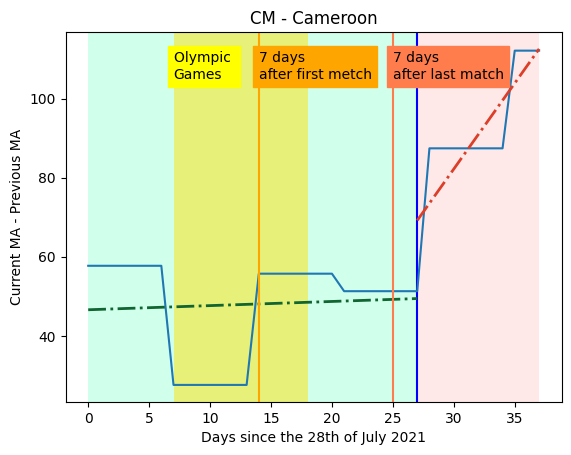

OUT [34]
values [ 56.85714286  56.85714286  55.          53.85714286  58.57142857
  58.57142857  61.85714286  65.85714286  65.57142857  67.57142857
  73.57142857  73.          80.28571429  78.71428571  79.
  82.          86.          89.14285714  92.71428571  95.42857143
 100.85714286 109.         114.57142857 118.28571429 121.
 127.57142857 127.57142857 126.14285714 121.71428571 116.85714286
 109.57142857  99.14285714  85.14285714  74.57142857  69.14285714
  59.71428571  51.71428571  49.28571429  45.71428571  44.42857143
  42.14285714  38.14285714  38.          40.          40.        ]
 
2.002 x + 54.69   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
-2.651 x + 150.5   [34 35 36 37 38 39 40 41 42 43 44]   range(34, 45)   #DB3F29


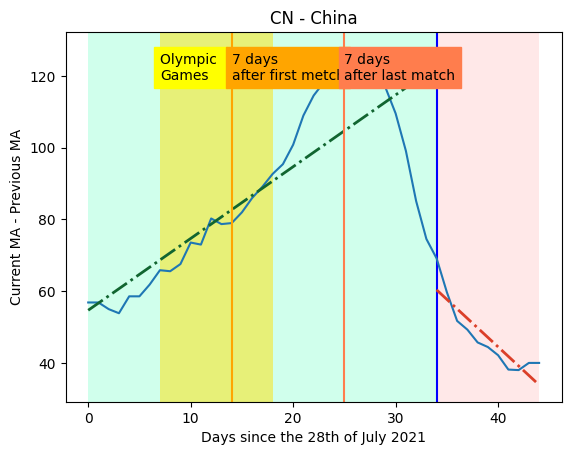

OUT [13 30]
values [20794.28571429 19794.42857143 19050.85714286 18530.42857143
 18389.         18215.14285714 17901.57142857 17229.71428571
 16374.57142857 15589.71428571 14914.14285714 13648.28571429
 12625.71428571 11489.71428571 11289.28571429 11020.71428571
 10608.42857143 10079.57142857  9788.85714286  9509.71428571
  9243.          8600.57142857  8274.85714286  7824.85714286
  7470.28571429  7044.85714286  6367.14285714  5993.85714286
  5568.          5322.85714286  4998.85714286  4577.
  4285.          4111.          3987.85714286  3887.71428571
  3571.42857143  3417.28571429  3330.          3181.14285714
  3110.85714286  3044.71428571  2933.28571429  2832.42857143
  2652.71428571]
 
-605.1 x + 2.079e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
-402.4 x + 1.701e+04   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]   range(13, 31)   #D7A449
 
-150.7 x + 9171   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


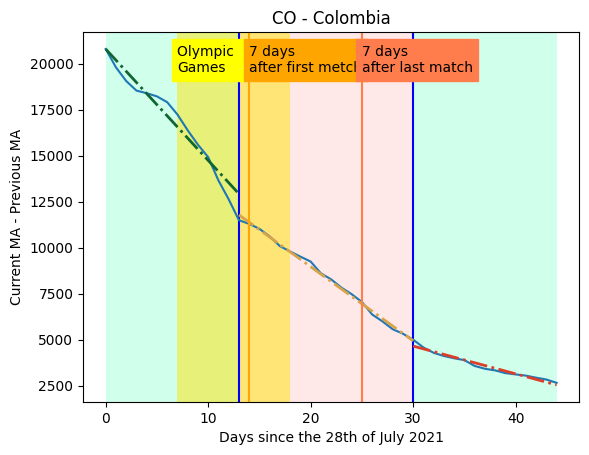

OUT [27]
values [1322.42857143 1375.85714286 1337.14285714 1330.85714286 1312.71428571
 1332.         1325.85714286 1295.14285714 1277.85714286 1310.14285714
 1258.57142857 1240.57142857 1219.28571429 1201.         1129.85714286
 1120.57142857 1105.28571429 1172.28571429 1207.         1226.57142857
 1284.57142857 1297.         1343.85714286 1362.71428571 1409.
 1450.14285714 1487.71428571 1468.85714286 1603.         1650.57142857
 1675.57142857 1659.71428571 1676.57142857 1671.         1669.57142857
 1676.71428571 1686.28571429 1730.42857143 1764.57142857 1801.14285714
 1813.         1899.         1941.57142857 2002.14285714 2058.57142857]
 
1.071 x + 1273   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
25.97 x + 825.2   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(27, 45)   #DB3F29


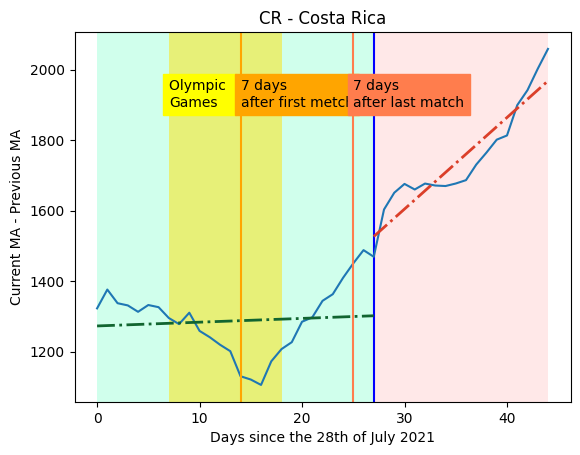

OUT [12]
values [6004.28571429 6384.28571429 6389.71428571 6291.42857143 6199.42857143
 6211.14285714 6274.57142857 6321.         6501.85714286 6691.
 6929.57142857 7297.28571429 7537.14285714 7800.85714286 8217.71428571
 8340.85714286 8476.85714286 8640.14285714 8767.85714286 8924.28571429
 9170.85714286 9176.57142857 9146.85714286 9168.28571429 9170.85714286
 9125.14285714 8935.28571429 8836.28571429 8728.         8698.71428571
 8616.71428571 8605.71428571 8492.71428571 8666.85714286 8786.28571429
 8795.         8906.14285714 9113.57142857 9245.57142857 9375.85714286
 9397.42857143 9416.71428571 9412.57142857 9346.42857143 9042.85714286]
 
79.44 x + 6021   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
29.78 x + 8017   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44]   range(12, 45)   #DB3F29


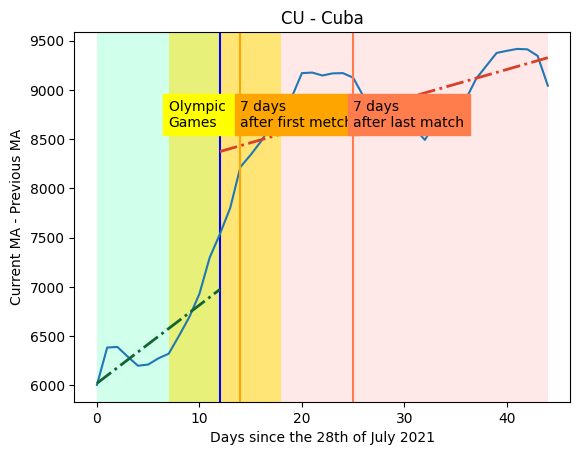

OUT [30]
values [42.85714286 42.42857143 43.71428571 43.         42.28571429 44.42857143
 43.28571429 38.28571429 38.85714286 38.57142857 38.71428571 39.28571429
 36.42857143 38.57142857 41.         38.42857143 37.         35.71428571
 35.         34.         33.14285714 32.         31.42857143 30.42857143
 31.28571429 32.85714286 35.42857143 36.28571429 37.85714286 42.
 44.28571429 47.71428571 49.28571429 47.         47.57142857 51.14285714
 51.85714286 51.28571429 48.85714286 48.71428571 52.28571429 54.28571429
 55.71428571 56.28571429 62.        ]
 
-0.3358 x + 42.69   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
0.8679 x + 19.11   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


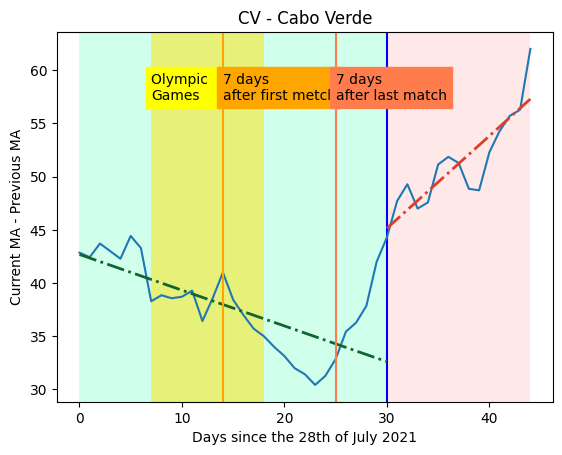

OUT [5]
values [ 9.71428571 14.14285714 24.71428571 24.71428571 24.71428571 55.14285714
 58.42857143 66.42857143 72.71428571 71.57142857 71.57142857 71.57142857
 68.14285714 70.85714286 70.71428571 69.28571429 65.         65.
 65.         59.57142857 56.         54.14285714 55.42857143 59.14285714
 59.14285714 59.14285714 64.71428571 63.57142857 64.71428571 71.14285714
 69.85714286 69.85714286 69.85714286 64.         66.42857143 68.
 59.71428571 58.         58.         58.         52.42857143 56.71428571
 51.28571429 47.85714286 47.42857143]
 
4.057 x + 11.49   [0 1 2 3 4 5]   range(0, 6)   #116530
 
-0.3025 x + 70.05   [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(5, 45)   #DB3F29


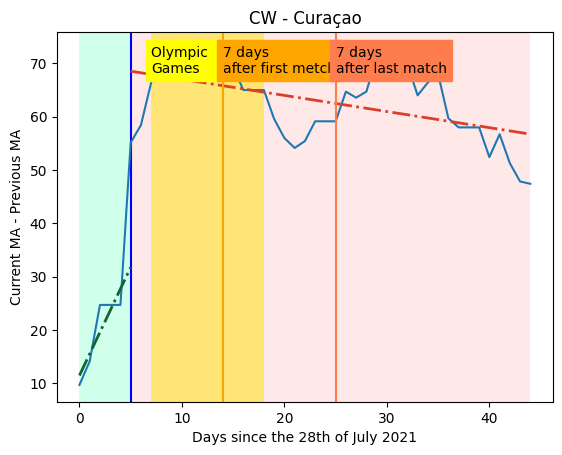

OUT [18]
values [ 959.57142857  982.28571429  992.42857143  987.85714286  989.14285714
 1021.14285714 1008.85714286  993.71428571  978.57142857  970.28571429
  950.42857143  931.71428571  902.42857143  873.28571429  838.28571429
  782.42857143  745.28571429  738.57142857  674.28571429  623.14285714
  595.57142857  567.85714286  557.14285714  541.42857143  521.
  537.          530.28571429  526.71428571  513.71428571  488.28571429
  473.14285714  444.85714286  412.85714286  403.57142857  380.57142857
  373.28571429  375.85714286  360.42857143  347.57142857  351.57142857
  344.71428571  336.57142857  311.42857143  287.71428571  289.57142857]
 
-14.54 x + 1048   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
-13.54 x + 870.6   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44]   range(18, 45)   #DB3F29


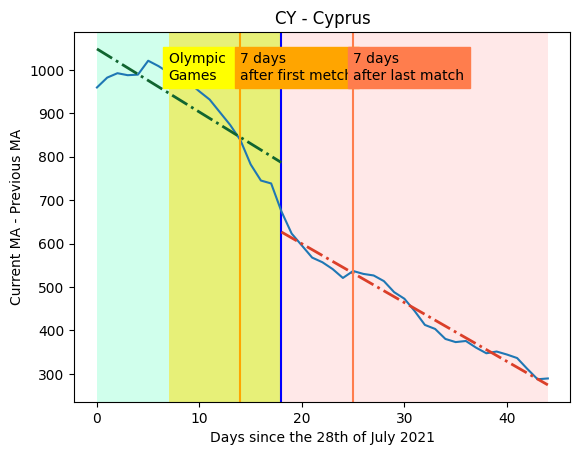

OUT [10]
values [251.71428571 245.42857143 239.14285714 242.85714286 236.85714286
 233.42857143 230.85714286 227.         225.71428571 217.85714286
 208.42857143 203.14285714 200.57142857 193.57142857 188.28571429
 188.14285714 181.42857143 178.85714286 177.85714286 170.57142857
 168.57142857 169.42857143 162.57142857 167.28571429 173.71428571
 178.14285714 181.42857143 184.14285714 186.42857143 189.85714286
 196.42857143 193.71428571 189.28571429 195.85714286 201.57142857
 200.14285714 196.71428571 189.28571429 188.85714286 194.
 192.85714286 185.85714286 191.         198.         199.42857143]
 
-3.29 x + 249.9   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
0.2691 x + 180.3   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44]   range(10, 45)   #DB3F29


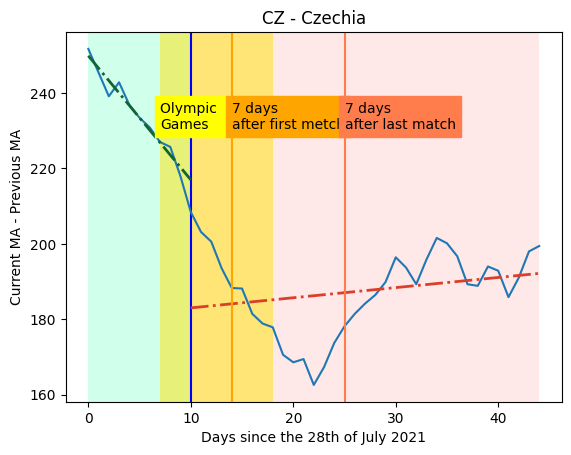

OUT [30]
values [ 799.57142857  799.57142857  799.57142857 1301.85714286 1301.85714286
 1301.85714286 1301.85714286 1301.85714286 1301.85714286 1301.85714286
 1806.57142857 1806.57142857 1806.57142857 1806.57142857 1806.57142857
 1806.57142857 1806.57142857 2217.42857143 2217.42857143 2217.42857143
 2217.42857143 2217.42857143 2217.42857143 2217.42857143 2917.57142857
 2917.57142857 2917.57142857 2917.57142857 2917.57142857 2917.57142857
 2917.57142857 4582.42857143 4582.42857143 4582.42857143 4582.42857143
 4582.42857143 4582.42857143 4582.42857143 7093.14285714 7093.14285714
 7093.14285714 7093.14285714 7093.14285714 7093.14285714 7093.14285714]
 
74.14 x + 831.2   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
292.7 x - 5187   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


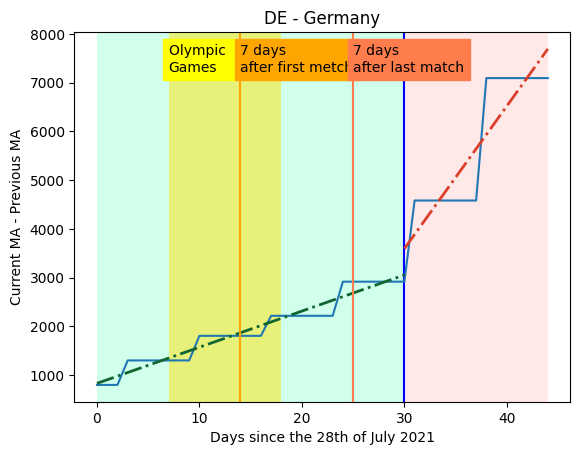

OUT [28]
values [1.71428571 1.14285714 1.14285714 1.14285714 1.71428571 0.85714286
 1.         1.14285714 1.         1.71428571 1.85714286 1.14285714
 1.42857143 1.71428571 2.57142857 2.85714286 2.42857143 2.28571429
 2.42857143 2.28571429 2.14285714 1.28571429 1.         1.14285714
 1.14285714 1.42857143 1.42857143 1.14285714 1.85714286 2.28571429
 2.42857143 2.71428571 2.85714286 2.85714286 3.71428571 2.85714286
 2.42857143 2.         1.71428571 2.         2.14285714 1.71428571
 2.57142857 3.28571429 4.42857143]
 
0.01157 x + 1.425   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
0.03221 x + 1.42   [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(28, 45)   #DB3F29


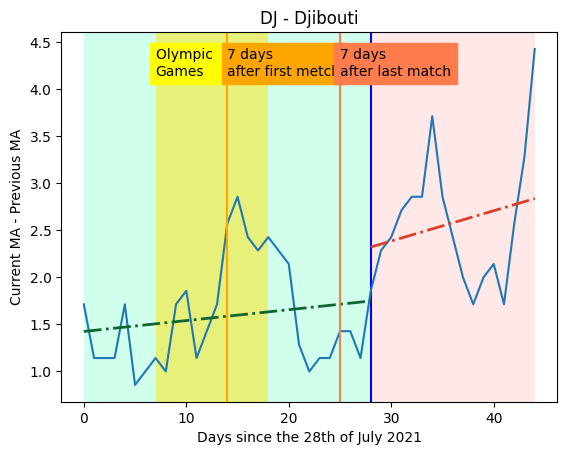

OUT [1]
values [ 777.57142857  846.57142857  905.          977.85714286  982.42857143
  981.85714286  948.28571429  898.14285714  850.14285714  814.
  773.85714286  774.28571429  764.          726.71428571  788.57142857
  794.71428571  848.71428571  847.28571429  882.85714286  884.71428571
  920.57142857  869.57142857  881.57142857  850.14285714  879.71428571
  869.42857143  890.85714286  918.57142857  952.14285714  974.
  998.71428571  994.57142857  998.71428571 1002.14285714  985.28571429
  989.71428571  975.28571429  958.85714286  974.14285714  955.57142857
  929.14285714  994.          964.57142857  964.28571429  964.57142857]
Error in  DK
 ** On entry to DLASCLS parameter number  4 had an illegal value
OUT [24]
values [  0.28571429   0.28571429   0.28571429   1.28571429   1.28571429
   1.           1.           1.           1.42857143   1.42857143
   0.42857143   0.42857143   0.42857143   0.42857143   0.57142857
   0.14285714   0.14285714   1.           1.28571429   1.28571429
   

/usr/local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


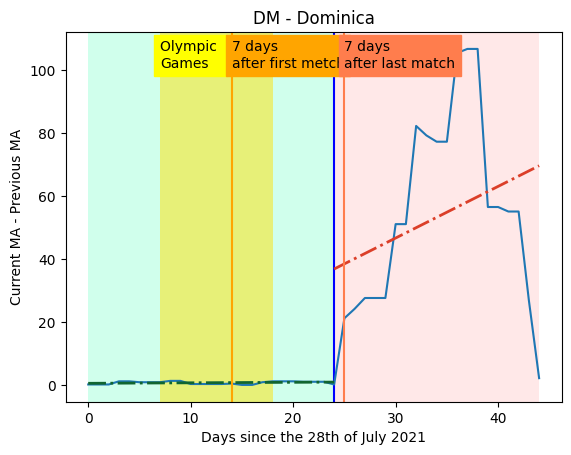

OUT [6]
values [666.85714286 616.85714286 615.57142857 584.85714286 556.28571429
 456.28571429 413.71428571 383.14285714 394.         372.71428571
 360.28571429 354.         356.         360.42857143 360.42857143
 325.28571429 315.42857143 319.42857143 316.28571429 347.14285714
 336.         338.85714286 333.28571429 331.28571429 320.85714286
 318.28571429 280.71428571 283.71428571 276.         259.
 258.28571429 258.42857143 240.14285714 262.         239.14285714
 225.         238.85714286 247.57142857 239.57142857 237.
 223.85714286 248.42857143 267.57142857 274.         269.        ]
 
-36.15 x + 673.2   [0 1 2 3 4 5 6]   range(0, 7)   #116530
 
-4.245 x + 408.3   [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(6, 45)   #DB3F29


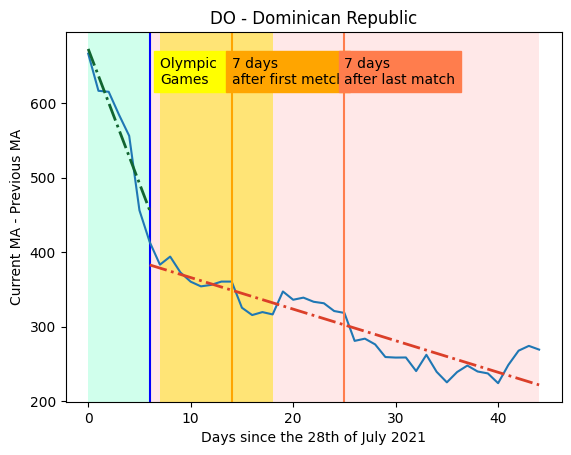

OUT [31]
values [ 823.57142857  893.42857143  945.71428571  987.71428571 1032.42857143
 1075.14285714 1128.71428571 1172.57142857 1186.71428571 1208.57142857
 1236.85714286 1263.71428571 1310.57142857 1345.71428571 1446.57142857
 1493.57142857 1518.         1503.42857143 1487.         1466.
 1432.14285714 1370.42857143 1335.         1289.57142857 1280.57142857
 1258.85714286 1206.57142857 1159.71428571 1066.71428571 1004.14285714
  955.14285714  899.85714286  840.28571429  800.          759.42857143
  741.85714286  719.42857143  679.14285714  645.14285714  617.85714286
  588.71428571  566.14285714  541.          513.71428571  504.28571429]
 
7.229 x + 1114   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]   range(0, 32)   #116530
 
-29.72 x + 1787   [31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(31, 45)   #DB3F29


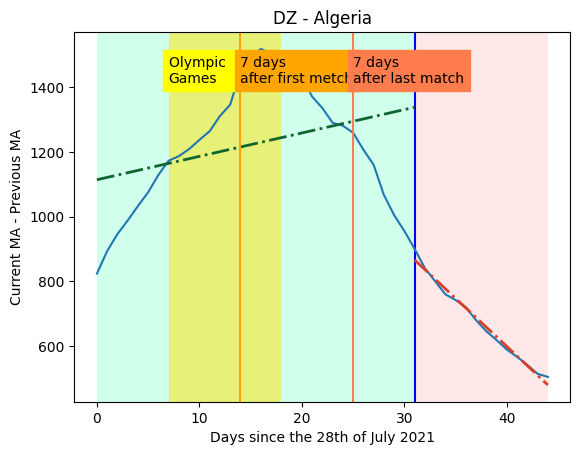

OUT [26]
values [ 961.14285714  977.71428571 1109.85714286 1034.14285714 1102.71428571
 1128.28571429 1009.14285714  979.71428571 1008.85714286 1010.42857143
  786.42857143  665.          947.85714286  826.71428571  731.14285714
  841.28571429  832.          950.28571429  982.57142857  679.28571429
  765.14285714  823.42857143  694.71428571  663.          637.
  655.14285714  651.85714286  467.71428571  521.57142857  461.57142857
  451.85714286  426.85714286  404.42857143  407.14285714  483.14285714
  499.14285714  473.28571429  506.71428571  542.14285714  523.28571429
  516.14285714  493.          427.          429.14285714  364.14285714]
 
-16.14 x + 1079   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
-3.617 x + 602.9   [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(26, 45)   #DB3F29


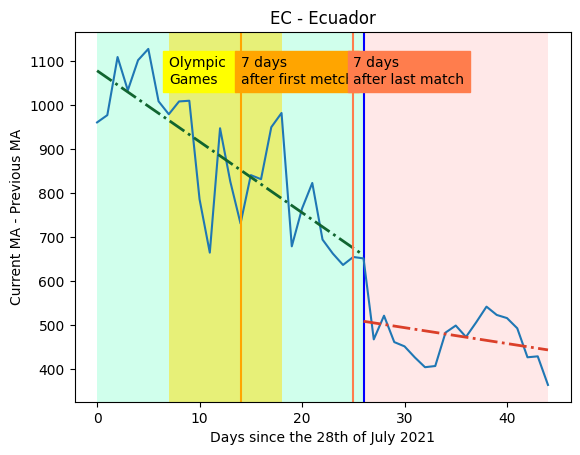

OUT [16]
values [ 43.          43.          43.          53.57142857  53.57142857
  53.57142857  53.57142857  53.57142857  53.57142857  53.57142857
  92.14285714  92.14285714  92.14285714  92.14285714  92.14285714
  92.14285714  92.14285714 178.         178.         178.
 178.         178.         178.         178.         210.28571429
 210.28571429 210.28571429 210.28571429 210.28571429 210.28571429
 210.28571429 277.42857143 277.42857143 277.42857143 277.42857143
 277.42857143 277.42857143 277.42857143 281.42857143 281.42857143
 281.42857143 281.42857143 281.42857143 281.42857143 281.42857143]
 
4.01 x + 35.98   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]   range(0, 17)   #116530
 
5.553 x + 65.22   [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]   range(16, 45)   #DB3F29


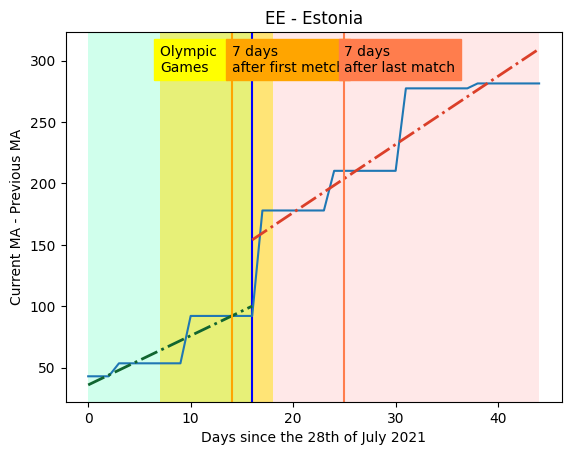

OUT [7]
values [118.14285714 107.57142857 100.42857143  93.          85.85714286
  78.57142857  70.42857143  64.71428571  59.42857143  54.28571429
  49.85714286  45.85714286  42.42857143  39.57142857  38.
  37.71428571  38.28571429  39.57142857  41.          43.28571429
  46.42857143  49.14285714  50.42857143  52.14285714  54.14285714
  56.42857143  61.          65.71428571  70.57142857  76.85714286
  82.57142857  88.          93.14285714  96.57142857 100.28571429
 104.85714286 110.         119.57142857 130.14285714 142.
 153.71428571 165.42857143 176.85714286 189.71428571 199.71428571]
 
-7.704 x + 116.5   [0 1 2 3 4 5 6 7]   range(0, 8)   #116530
 
3.667 x - 11.15   [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(7, 45)   #DB3F29


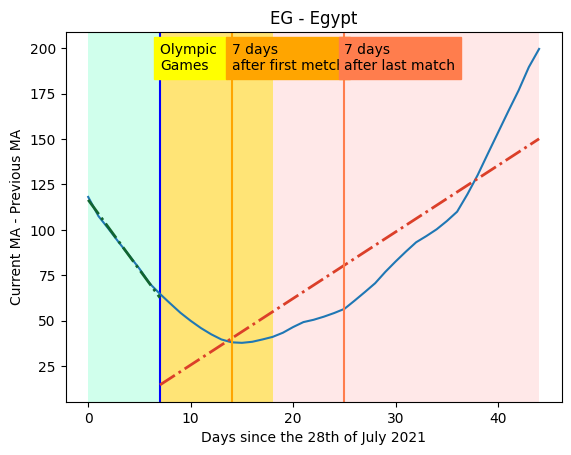

OUT [21]
values [17.57142857 20.         20.42857143 17.85714286 16.85714286 19.71428571
 17.57142857 18.         14.         12.71428571 13.28571429 13.28571429
  9.14285714  9.57142857  9.42857143  9.14285714  7.71428571  7.42857143
  7.42857143  7.57142857  6.71428571  4.14285714  4.14285714  4.42857143
  4.14285714  4.14285714  4.28571429  3.57142857  3.57142857  3.42857143
  3.42857143  3.57142857  3.57142857  2.          2.85714286  2.57142857
  3.          2.57142857  2.71428571  3.14285714  3.          3.28571429
  3.42857143  2.57142857  3.        ]
 
-0.743 x + 20.55   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]   range(0, 22)   #116530
 
-0.06708 x + 5.537   [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(21, 45)   #DB3F29


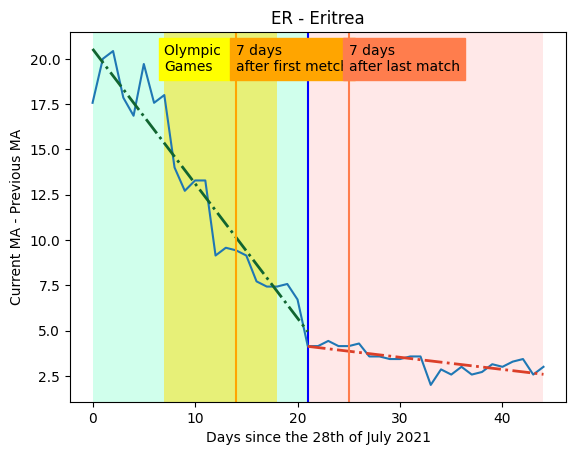

OUT [24]
values [19333.85714286 19333.85714286 19333.85714286 25223.42857143
 25223.42857143 25223.42857143 25223.42857143 25223.42857143
 25223.42857143 25223.42857143 26530.42857143 26530.42857143
 26530.42857143 26530.42857143 26530.42857143 26530.42857143
 26530.42857143 22522.57142857 22522.57142857 22522.57142857
 22522.57142857 22522.57142857 22522.57142857 22522.57142857
 17034.85714286 17034.85714286 17034.85714286 17034.85714286
 17034.85714286 17034.85714286 17034.85714286 12951.
 12951.         12951.         12951.         12951.
 12951.         12951.          9775.85714286  9775.85714286
  9775.85714286  9775.85714286  9775.85714286  9775.85714286
  9775.85714286]
 
33.52 x + 2.37e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]   range(0, 25)   #116530
 
-461.9 x + 2.896e+04   [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(24, 45)   #DB3F29


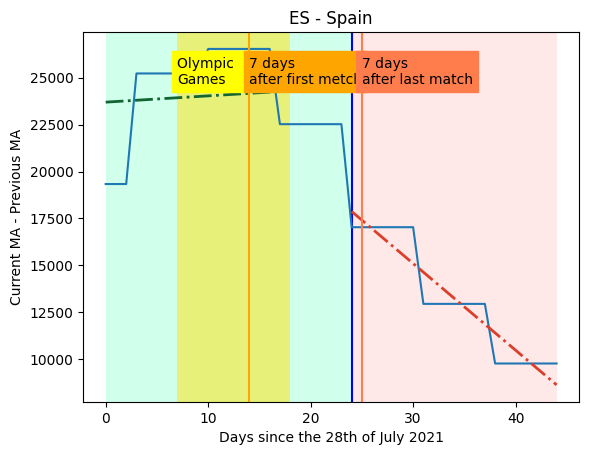

OUT [13]
values [  90.71428571   92.           95.           90.14285714   89.28571429
   91.85714286   95.           91.57142857   94.57142857   99.57142857
  118.71428571  121.          133.85714286  149.          170.57142857
  217.71428571  255.85714286  274.14285714  288.85714286  302.28571429
  340.          379.71428571  409.85714286  436.85714286  471.71428571
  503.71428571  528.28571429  587.57142857  639.28571429  669.42857143
  725.28571429  731.57142857  740.42857143  775.85714286  772.14285714
  788.14285714  792.42857143  796.85714286  890.14285714  932.85714286
  967.         1025.57142857 1184.14285714 1283.14285714 1347.71428571]
 
2.952 x + 82.54   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
33.69 x - 323.3   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


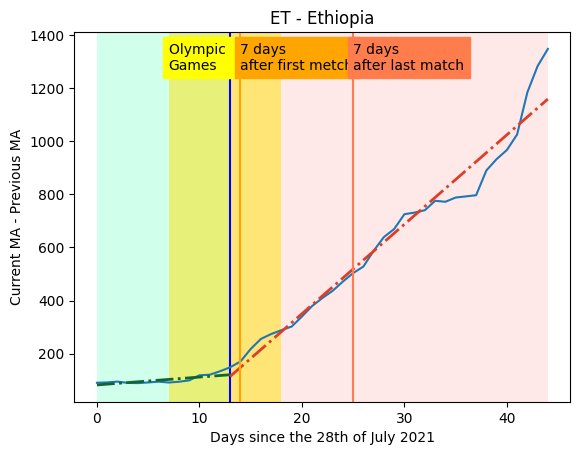

OUT [13]
values [266.14285714 278.71428571 292.71428571 299.57142857 307.57142857
 320.         332.71428571 344.28571429 356.85714286 371.71428571
 389.28571429 403.         417.71428571 468.         511.28571429
 560.28571429 601.14285714 632.28571429 647.28571429 665.28571429
 682.57142857 699.         695.14285714 709.85714286 708.28571429
 719.42857143 728.14285714 749.         747.         766.85714286
 754.42857143 762.28571429 754.         740.85714286 702.14285714
 689.85714286 659.14285714 641.71428571 629.71428571 625.57142857
 627.         615.14285714 596.42857143 595.14285714 587.28571429]
 
12.4 x + 262.6   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
1.008 x + 636   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


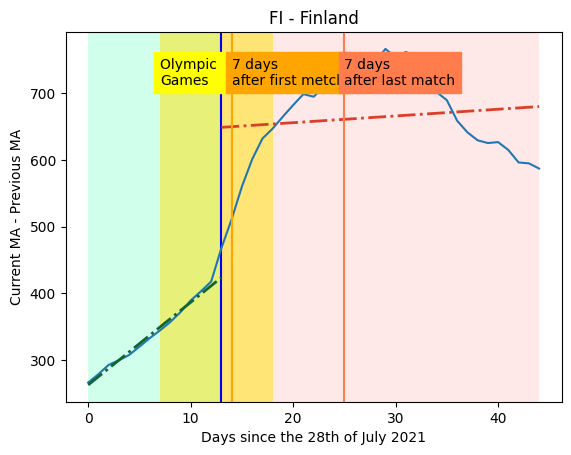

OUT [27]
values [ 746.42857143  824.28571429  920.57142857 1000.28571429  987.57142857
 1045.71428571 1111.         1067.85714286  934.          863.14285714
  803.57142857  875.14285714  826.71428571  821.85714286  876.57142857
  975.85714286 1038.28571429 1039.14285714 1012.71428571 1084.85714286
 1103.42857143 1055.85714286  997.14285714  934.42857143  938.
  867.          730.42857143  642.          560.57142857  545.14285714
  492.57142857  465.42857143  429.28571429  475.85714286  488.
  542.71428571  520.          503.42857143  480.          514.42857143
  473.28571429  416.42857143  365.28571429  325.28571429  333.85714286]
 
1.286 x + 927.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
-11.59 x + 887.8   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(27, 45)   #DB3F29


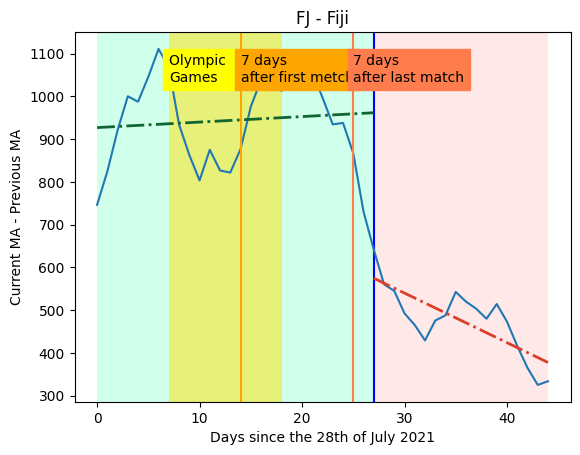

OUT [1]
values [0.14285714 0.14285714 0.14285714 0.42857143 0.42857143 0.42857143
 0.57142857 0.42857143 0.42857143 0.42857143 0.14285714 0.14285714
 0.14285714]
Error in  FK
 ** On entry to DLASCLS parameter number  4 had an illegal value
OUT [15]
values [13.57142857 12.42857143 12.57142857 10.85714286  8.14285714  7.57142857
  7.14285714  7.28571429  7.71428571  7.42857143  7.          6.57142857
  5.71428571  5.42857143  4.42857143  3.42857143  2.42857143  1.85714286
  2.          1.71428571  1.14285714  1.          0.85714286  0.85714286
  0.71428571  0.57142857  0.57142857  0.28571429  0.28571429  0.42857143
  0.42857143  0.57142857  0.42857143  0.42857143  0.57142857  0.57142857
  0.57142857  0.57142857  0.42857143  0.71428571  0.71428571  0.85714286
  0.85714286  0.57142857  0.57142857]
 
-0.5735 x + 12.27   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
-0.05164 x + 2.424   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 3

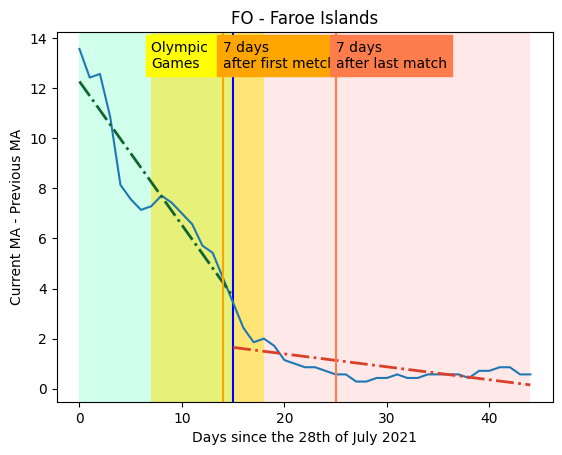

OUT [10]
values [ 3331.14285714  3331.14285714  3331.14285714  6665.14285714
  6665.14285714  6665.14285714  6665.14285714  6665.14285714
  6665.14285714  6665.14285714 16868.28571429 16868.28571429
 16868.28571429 16868.28571429 16868.28571429 16868.28571429
 16868.28571429 20454.71428571 20454.71428571 20454.71428571
 20454.71428571 20454.71428571 20454.71428571 20454.71428571
 21019.28571429 21019.28571429 21019.28571429 21019.28571429
 21019.28571429 21019.28571429 21019.28571429 21561.42857143
 21561.42857143 21561.42857143 21561.42857143 21561.42857143
 21561.42857143 21561.42857143 19081.57142857 19081.57142857
 19081.57142857 19081.57142857 19081.57142857 19081.57142857
 19081.57142857]
 
424.3 x + 3755   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
75.95 x + 1.775e+04   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44]   range(10, 45)   #DB3F29


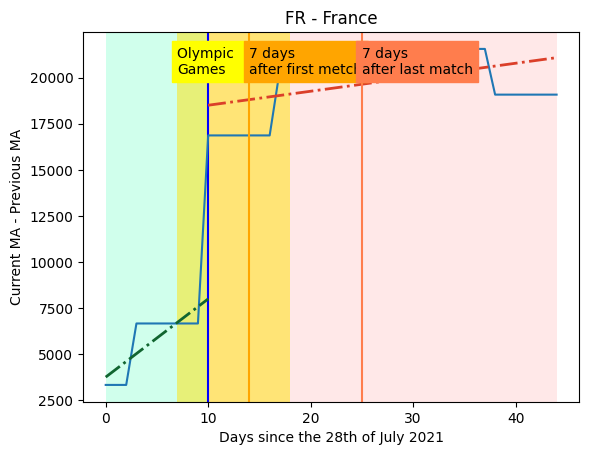

OUT [27]
values [16.         16.         13.71428571 13.71428571 13.71428571 12.14285714
 12.14285714  9.14285714  9.14285714  9.28571429  9.28571429  9.28571429
  8.71428571  8.71428571  8.71428571  8.71428571  8.42857143  8.42857143
  8.42857143  8.71428571  8.71428571 10.         10.         11.14285714
 11.14285714 11.14285714 11.71428571 11.71428571 12.71428571 12.71428571
 14.57142857 14.57142857 14.57142857 17.14285714 17.14285714 13.85714286
 13.85714286 14.71428571 14.71428571 14.71428571 15.71428571 15.71428571
 19.42857143 19.42857143 21.71428571]
 
-0.1562 x + 12.63   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
0.374 x + 2.222   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(27, 45)   #DB3F29


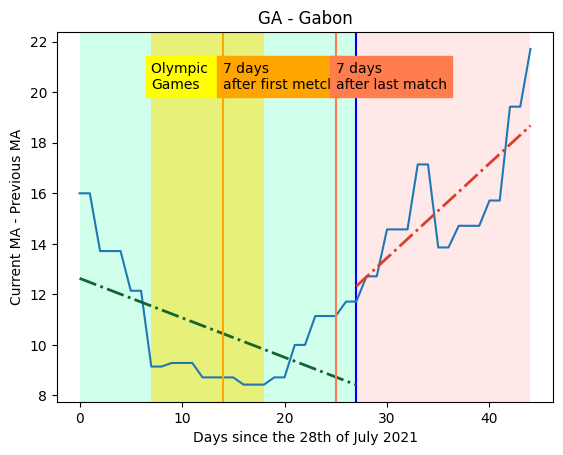

OUT [11]
values [36645.85714286 38976.28571429 42973.42857143 46182.
 47624.42857143 48435.71428571 48923.28571429 47804.57142857
 45038.57142857 40649.71428571 36728.71428571 34496.71428571
 32497.42857143 29934.14285714 28463.57142857 27704.85714286
 27298.28571429 26860.         26534.         26362.28571429
 26342.14285714 26469.42857143 26769.57142857 27230.71428571
 27700.14285714 27981.57142857 28253.28571429 28585.
 28734.28571429 28878.85714286 28888.28571429 29022.42857143
 29382.         29730.57142857 30408.42857143 31323.
 32092.85714286 32775.         33240.28571429 33737.28571429
 34225.28571429 34626.42857143 34592.42857143 34597.85714286
 34756.71428571]
 
162.2 x + 4.282e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11]   range(0, 12)   #116530
 
187.9 x + 2.485e+04   [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44]   range(11, 45)   #DB3F29


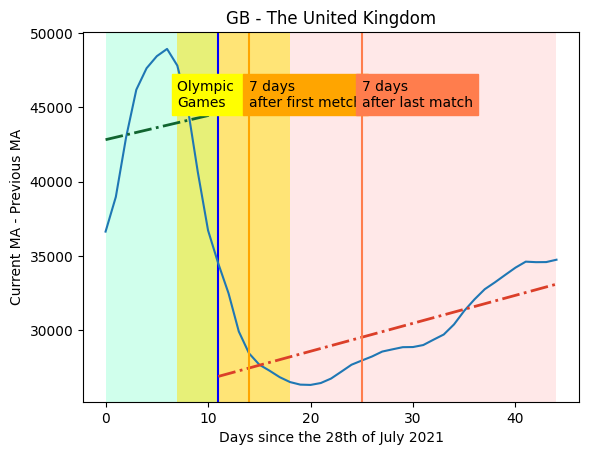

OUT [24 37]
values [ 0.14285714  0.14285714  0.14285714  0.14285714  0.14285714  0.14285714
  0.28571429  0.28571429  0.28571429  0.28571429  0.28571429  0.28571429
  0.28571429  0.14285714  0.42857143  0.42857143  0.42857143  0.57142857
  0.57142857  0.57142857  0.57142857  0.14285714  0.28571429  0.57142857
  0.42857143  1.28571429  1.28571429  1.57142857  1.57142857  1.42857143
  1.42857143  1.85714286  1.42857143  1.42857143  1.14285714  1.14285714
  2.28571429  2.          3.85714286  4.85714286  4.85714286  6.
  6.          4.85714286 14.28571429]
 
0.01646 x + 0.1262   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]   range(0, 25)   #116530
 
0.05259 x - 0.1711   [24 25 26 27 28 29 30 31 32 33 34 35 36 37]   range(24, 38)   #D7A449
 
1.138 x - 40.24   [37 38 39 40 41 42 43 44]   range(37, 45)   #DB3F29


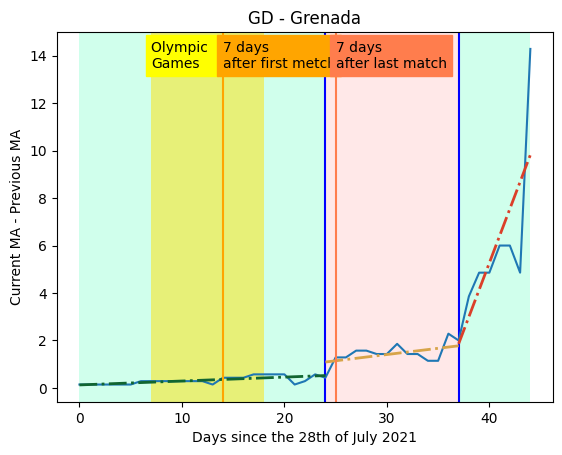

OUT [20]
values [1286.57142857 1364.42857143 1427.85714286 1475.57142857 1502.57142857
 1610.14285714 1717.71428571 1841.         1956.28571429 2071.85714286
 2182.57142857 2242.         2392.         2495.71428571 2572.14285714
 2608.14285714 2690.85714286 2775.57142857 2831.42857143 2997.28571429
 3153.28571429 3278.14285714 3430.71428571 3576.42857143 3675.
 3758.         3882.28571429 4042.14285714 4250.42857143 4476.
 4670.71428571 4809.28571429 4872.14285714 4945.14285714 5025.42857143
 4995.85714286 4907.85714286 4811.         4738.         4692.
 4651.42857143 4523.85714286 4410.57142857 4308.85714286 4215.42857143]
 
92.82 x + 1220   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]   range(0, 21)   #116530
 
54.44 x + 2582   [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44]   range(20, 45)   #DB3F29


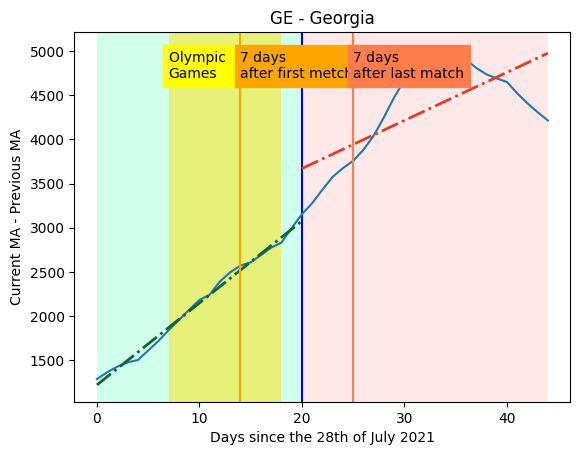

OUT [27]
values [ 85.71428571  73.57142857  74.57142857  74.57142857  74.57142857
  82.          82.71428571  86.28571429 100.71428571 104.28571429
 104.28571429 104.28571429  98.71428571  97.28571429  95.
  88.71428571  90.14285714  90.14285714  90.14285714  91.85714286
  90.71428571  94.42857143 102.28571429 101.57142857 101.57142857
 101.57142857 110.         118.14285714 118.28571429 125.28571429
 135.85714286 135.85714286 135.85714286 154.42857143 164.28571429
 172.14285714 176.57142857 176.28571429 176.28571429 176.28571429
 181.71428571 146.57142857 154.         185.28571429 158.        ]
 
0.8976 x + 80.62   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
3.116 x + 44.46   [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(27, 45)   #DB3F29


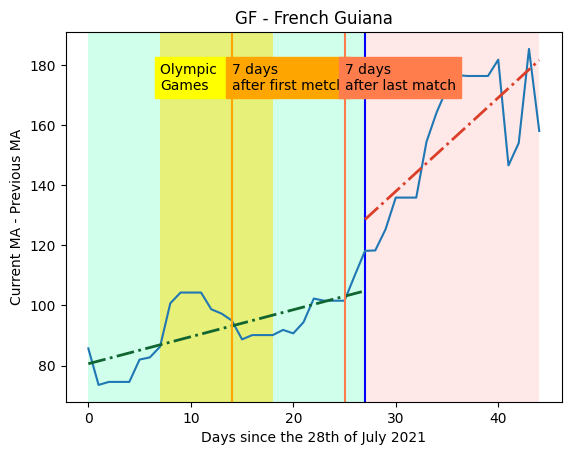

OUT [3]
values [ 1.42857143  1.42857143  2.42857143  3.85714286  5.28571429  6.
  6.42857143  6.71428571  6.71428571  6.85714286  6.14285714  5.
  4.85714286  5.14285714  4.71428571  5.          4.14285714  4.14285714
  3.85714286  4.71428571  4.14285714  5.14285714  5.85714286  6.85714286
  6.57142857  7.28571429  6.57142857  8.          7.85714286  8.57142857
  9.28571429 10.14285714 11.14285714 10.85714286 11.28571429 13.
 12.28571429 12.57142857 12.85714286 12.14285714 13.14285714 12.42857143
 10.28571429 11.57142857 12.57142857]
 
0.5 x + 1.262   [0 1 2 3]   range(0, 4)   #116530
 
0.2183 x + 2.775   [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(3, 45)   #DB3F29


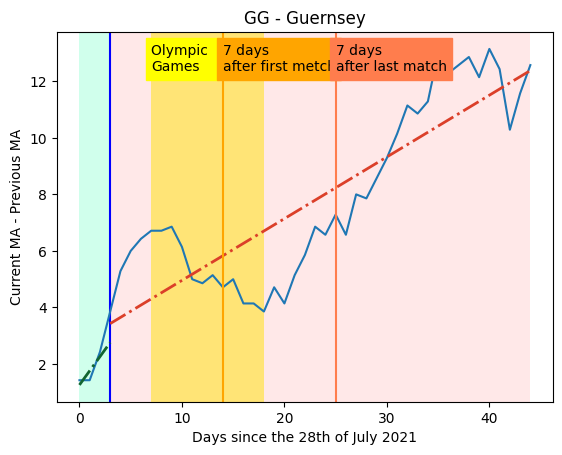

OUT [20]
values [241.         225.         204.57142857 286.57142857 265.71428571
 305.14285714 259.28571429 336.14285714 287.14285714 420.42857143
 405.         435.         395.57142857 395.57142857 264.14285714
 264.14285714 130.85714286  64.28571429 282.14285714 356.14285714
 433.42857143 487.85714286 685.42857143 743.85714286 808.28571429
 575.42857143 559.42857143 526.14285714 553.14285714 487.85714286
 429.42857143 528.71428571 558.         500.         603.
 611.14285714 552.85714286 613.28571429 449.57142857 501.85714286
 587.42857143 525.57142857 526.         452.         558.71428571]
 
0.2433 x + 288.9   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]   range(0, 21)   #116530
 
-3.283 x + 659.4   [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44]   range(20, 45)   #DB3F29


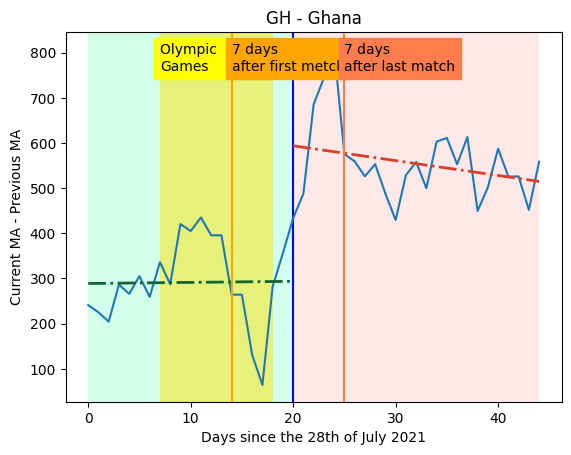

OUT [30]
values [11.57142857 14.42857143 18.         21.71428571 24.71428571 23.57142857
 27.28571429 30.14285714 31.14285714 30.         28.28571429 27.71428571
 29.14285714 27.71428571 26.57142857 26.85714286 27.71428571 27.71428571
 26.42857143 25.85714286 25.42857143 24.85714286 23.42857143 23.85714286
 22.         23.14285714 21.         19.42857143 20.         18.71428571
 15.28571429 14.85714286 12.14285714 13.28571429 14.14285714 11.
 10.57142857 10.42857143  9.14285714  9.42857143 10.          9.14285714
  8.57142857  7.57142857  7.71428571]
 
-0.003273 x + 24.33   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
-0.5291 x + 30.46   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


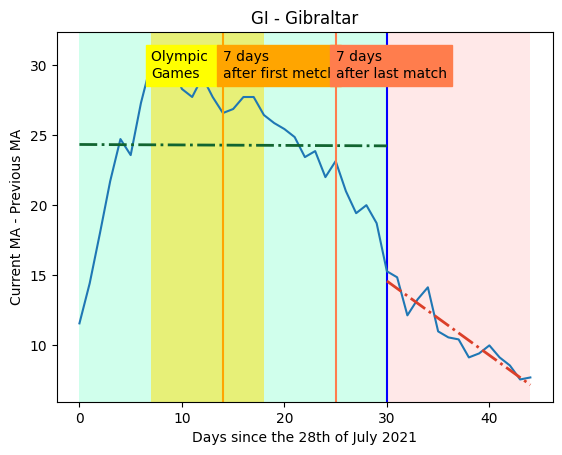

OUT [22]
values [ 2.          2.14285714  2.57142857  2.85714286  3.28571429  4.
  2.71428571  2.71428571  2.71428571  2.85714286  2.85714286  2.
  1.28571429  3.71428571  3.71428571  4.71428571  4.14285714  3.85714286
  4.28571429  4.28571429  1.85714286  3.57142857  4.71428571  6.
  7.          7.57142857  8.57142857  9.28571429  9.42857143 10.
 10.71428571 11.         10.          9.57142857 10.         10.28571429
  9.14285714  8.71428571  7.57142857  7.57142857  8.          7.57142857
  5.71428571  4.71428571  4.71428571]
 
0.063 x + 2.436   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]   range(0, 23)   #116530
 
-0.05858 x + 10.1   [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(22, 45)   #DB3F29


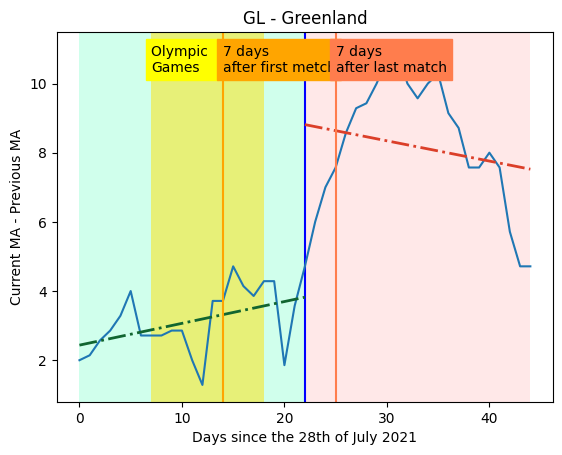

OUT [34]
values [ 61.          46.85714286  84.57142857  84.57142857 106.71428571
  91.42857143  78.71428571 103.28571429 103.28571429  59.
  59.          78.28571429  78.28571429 114.42857143  89.85714286
  89.85714286  89.85714286 137.57142857  83.85714286  97.57142857
  77.57142857  91.57142857  91.57142857 114.42857143  66.71428571
  66.71428571  75.42857143  81.14285714  67.14285714  84.57142857
  61.71428571  61.71428571  79.28571429  56.85714286  41.57142857
  41.57142857  34.85714286  39.28571429  39.28571429  21.71428571
  30.71428571  24.14285714  37.42857143  26.71428571  22.28571429]
 
-0.2615 x + 87.09   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
-1.7 x + 98.99   [34 35 36 37 38 39 40 41 42 43 44]   range(34, 45)   #DB3F29


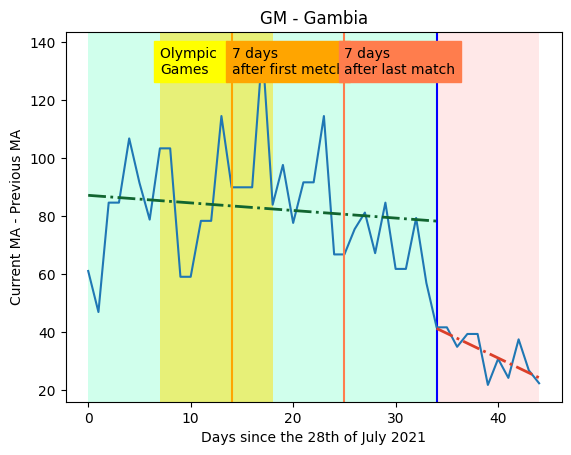

OUT [14]
values [ 52.14285714  63.42857143  78.71428571  82.42857143  84.57142857
  91.          75.          70.42857143  52.71428571  30.
  40.28571429  63.71428571  69.          82.57142857  98.
 115.71428571 131.85714286 131.57142857 111.57142857 127.85714286
 112.42857143 130.42857143 134.57142857 149.42857143 150.71428571
 160.         160.42857143 188.42857143 166.85714286 172.42857143
 141.42857143 164.14285714 163.28571429 142.42857143 131.57142857
 125.57142857 115.71428571 115.71428571  97.71428571  95.71428571
 102.          98.85714286  97.85714286  80.28571429  80.28571429]
 
-0.8031 x + 72.08   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
-1.121 x + 161.4   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44]   range(14, 45)   #DB3F29


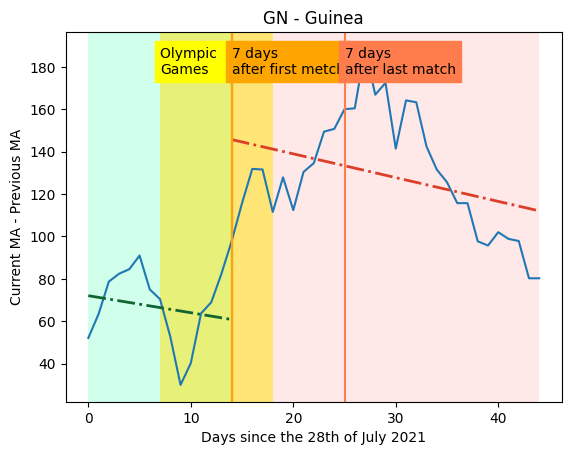

OUT [15]
values [  17.85714286   17.85714286   42.57142857   24.71428571   24.71428571
   24.71428571   24.71428571   24.71428571   24.71428571   47.28571429
   47.28571429   47.28571429   47.28571429   47.28571429   47.28571429
   47.28571429  156.14285714  156.14285714  156.14285714  401.71428571
  401.71428571  401.71428571  401.71428571  460.          460.
  460.          806.57142857  806.57142857  806.57142857  806.57142857
 1019.14285714 1019.14285714 1019.14285714 1216.         1216.
 1216.         1216.         1170.71428571 1170.71428571 1170.71428571
  381.71428571  381.71428571  381.71428571  381.71428571 1062.57142857]
 
2.176 x + 18.79   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
25.56 x - 62.26   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44]   range(15, 45)   #DB3F29


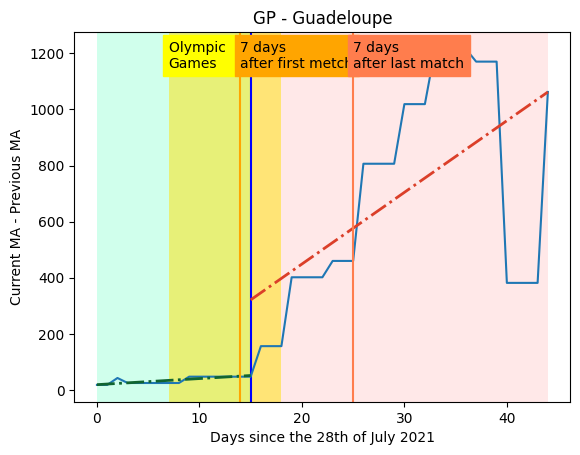

OUT [34]
values [ 5.42857143  8.28571429  8.28571429  4.71428571  4.71428571  4.71428571
  2.85714286  5.          2.14285714  2.14285714  4.57142857  4.57142857
  4.57142857  4.57142857  2.42857143  6.85714286  6.85714286  4.42857143
  4.42857143  6.85714286  6.85714286  6.85714286  2.42857143  2.42857143
  5.71428571  5.71428571  3.28571429  3.28571429  3.28571429  6.28571429
  6.28571429  3.          3.          8.42857143  8.42857143 14.
 11.         11.         17.71428571 17.71428571 12.28571429 23.28571429
 17.71428571 17.71428571 39.57142857]
 
-0.01238 x + 5.066   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
1.908 x - 57.09   [34 35 36 37 38 39 40 41 42 43 44]   range(34, 45)   #DB3F29


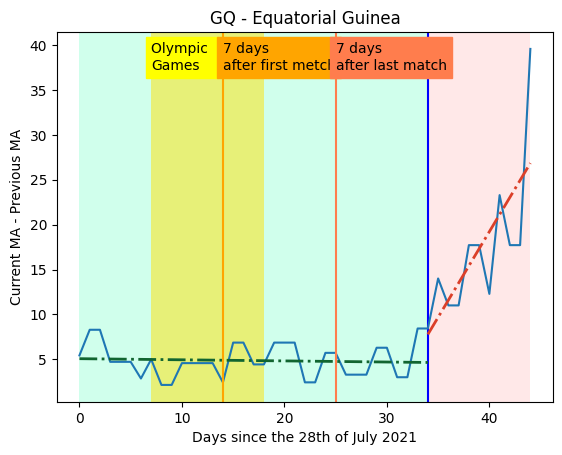

OUT [30]
values [1949.57142857 1949.57142857 1949.57142857 2566.28571429 2566.28571429
 2566.28571429 2566.28571429 2566.28571429 2566.28571429 2566.28571429
 2584.28571429 2584.28571429 2584.28571429 2584.28571429 2584.28571429
 2584.28571429 2584.28571429 2644.57142857 2644.57142857 2644.57142857
 2644.57142857 2644.57142857 2644.57142857 2644.57142857 2798.85714286
 2798.85714286 2798.85714286 2798.85714286 2798.85714286 2798.85714286
 2798.85714286 3223.85714286 3223.85714286 3223.85714286 3223.85714286
 3223.85714286 3223.85714286 3223.85714286 3196.71428571 3196.71428571
 3196.71428571 3196.71428571 3196.71428571 3196.71428571 3196.71428571]
 
19.82 x + 2286   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
7.911 x + 2890   [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(30, 45)   #DB3F29


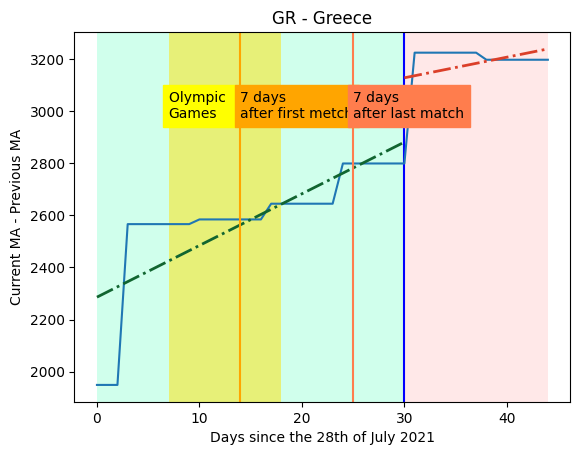

OUT [22]
values [2393.         2344.71428571 2335.57142857 2259.28571429 2183.71428571
 2174.         2234.57142857 2261.85714286 2352.28571429 2406.42857143
 2527.14285714 2608.71428571 2601.28571429 2494.42857143 2563.
 2559.         2091.14285714 2524.         2505.42857143 2524.85714286
 2546.28571429 2664.         2768.57142857 3339.71428571 3003.71428571
 2984.         2980.         3046.42857143 3077.71428571 3119.14285714
 3150.28571429 3174.42857143 3031.         3239.85714286 3321.14285714
 3325.71428571 3535.42857143 3682.14285714 3741.14285714 3931.71428571
 3744.28571429 3900.57142857 3982.85714286 3881.         3811.14285714]
 
14.88 x + 2260   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]   range(0, 23)   #116530
 
50.4 x + 1718   [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(22, 45)   #DB3F29


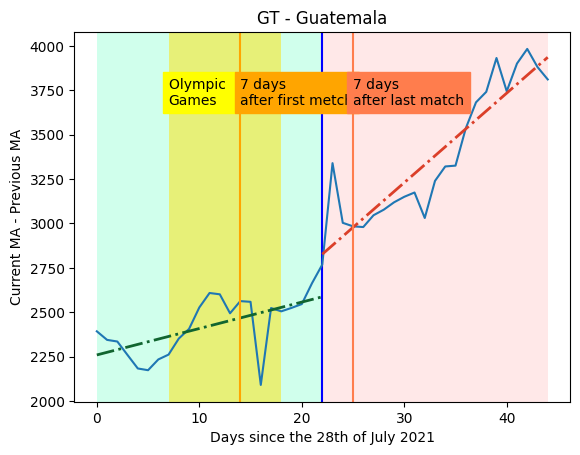

OUT [18]
values [  7.           6.42857143   6.42857143   6.42857143   3.42857143
   2.57142857   2.           3.71428571   3.28571429   3.28571429
   3.28571429   3.85714286   4.           5.           4.
   5.57142857   5.57142857   5.57142857   8.          11.
  12.71428571  15.71428571  16.85714286  16.85714286  16.85714286
  20.85714286  21.57142857  24.14285714  26.          27.85714286
  27.85714286  27.85714286  35.85714286  39.57142857  38.57142857
  44.42857143  53.          53.          53.          64.
  71.85714286  88.42857143  91.57142857 103.         103.        ]
 
-0.04423 x + 4.9   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
3.394 x - 63.97   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44]   range(18, 45)   #DB3F29


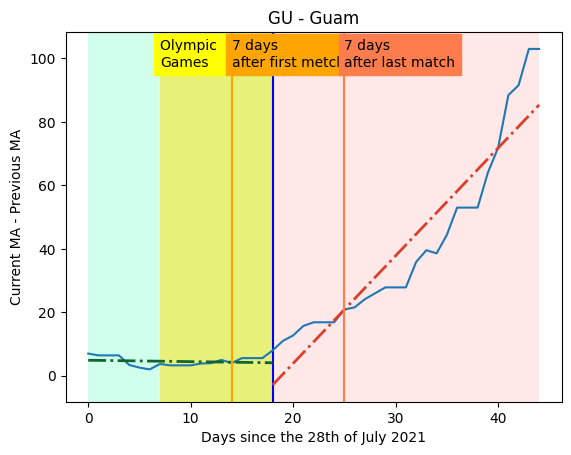

OUT [12]
values [11.         14.28571429 14.85714286 15.         15.         18.
 19.85714286 17.         16.28571429 23.42857143 23.         23.
 27.85714286 32.28571429 38.57142857 43.28571429 38.71428571 40.71428571
 40.71428571 43.71428571 42.14285714 41.71428571 35.85714286 40.71428571
 41.42857143 41.42857143 39.42857143 38.85714286 43.85714286 50.
 47.85714286 47.85714286 47.85714286 48.85714286 57.71428571 54.28571429
 52.         56.71428571 56.42857143 56.42857143 54.85714286 47.
 44.28571429 40.85714286 35.57142857]
 
0.9955 x + 12.08   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
0.4788 x + 31.13   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44]   range(12, 45)   #DB3F29


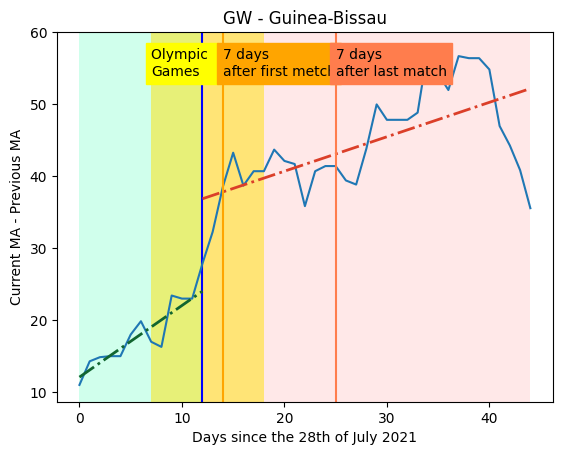

OUT [35]
values [ 69.57142857  82.57142857  73.85714286  73.85714286  78.14285714
  87.          86.28571429  87.57142857  72.85714286  76.14285714
  71.28571429  88.42857143  84.          82.14285714  80.85714286
  83.14285714  80.71428571  86.85714286  61.85714286  63.85714286
  62.57142857  58.42857143  55.71428571  59.57142857  55.
  58.42857143  55.          53.28571429  61.71428571  64.42857143
  65.          71.57142857  74.71428571  82.71428571  83.28571429
  85.71428571  91.28571429  98.85714286 100.42857143 109.85714286
 110.71428571 113.85714286 118.71428571 131.14285714 132.57142857]
 
-0.4977 x + 80.82   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]   range(0, 36)   #116530
 
5.098 x - 92.05   [35 36 37 38 39 40 41 42 43 44]   range(35, 45)   #DB3F29


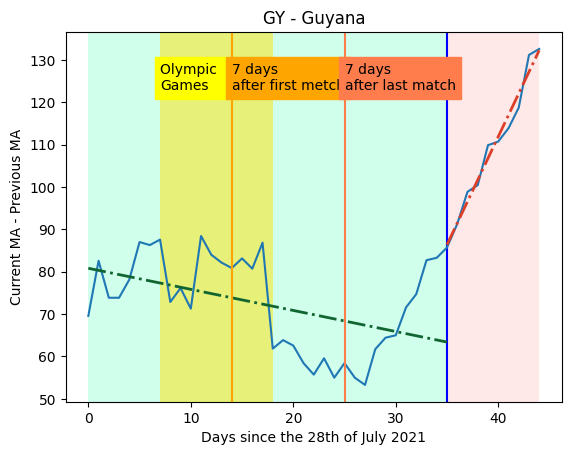

OUT [13]
values [ 807.85714286  900.          907.85714286  932.42857143  793.57142857
  682.71428571  946.71428571 1001.57142857 1028.28571429 1057.28571429
 1054.         1054.         1054.         1263.28571429 1285.85714286
 1254.57142857 1312.28571429 1496.57142857 1496.57142857 1496.57142857
 1446.42857143 1430.42857143 1488.28571429 1374.28571429 1260.71428571
 1260.71428571 1260.71428571 1208.14285714 1272.85714286 1257.85714286
 1452.85714286 1471.28571429 1471.28571429 1471.28571429 1543.14285714
 1580.71428571 1633.28571429 1554.14285714 1513.57142857 1513.57142857
 1513.57142857 1408.57142857 1385.28571429 1315.28571429 1237.14285714]
 
21.95 x + 808.3   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]   range(0, 14)   #116530
 
3.689 x + 1299   [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44]   range(13, 45)   #DB3F29


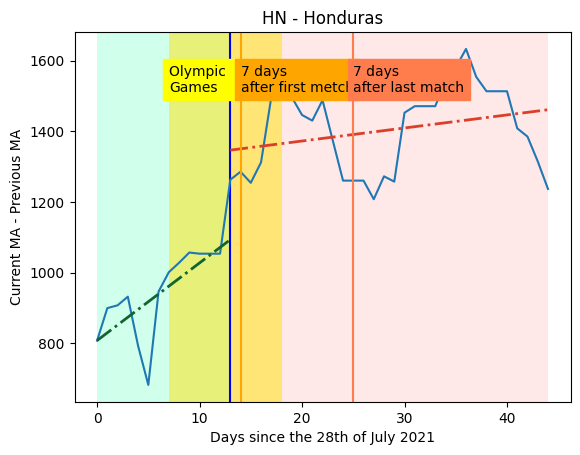

OUT [29]
values [ 85.14285714  89.28571429  95.57142857 102.85714286 109.85714286
 110.28571429 119.28571429 124.42857143 130.14285714 136.57142857
 144.         146.57142857 147.85714286 154.57142857 155.57142857
 156.85714286 156.         159.85714286 162.42857143 162.71428571
 161.71428571 172.14285714 180.57142857 171.71428571 173.85714286
 183.85714286 186.         194.57142857 210.28571429 222.57142857
 251.14285714 270.28571429 282.42857143 282.71428571 296.28571429
 316.71428571 338.57142857 361.42857143 381.14285714 391.85714286
 395.71428571 414.14285714 436.         457.71428571 476.        ]
 
3.727 x + 95.56   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]   range(0, 30)   #116530
 
16.15 x - 241   [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(29, 45)   #DB3F29


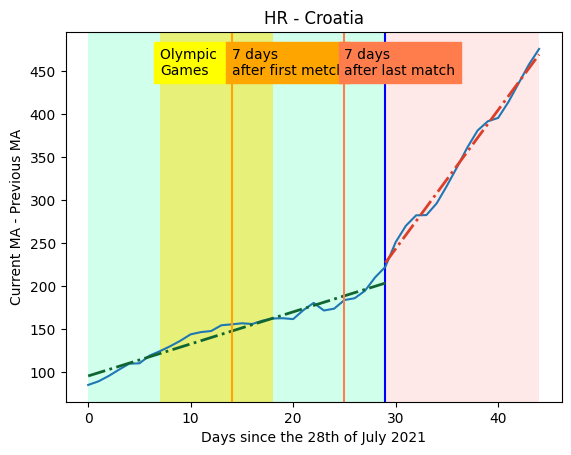

OUT [26]
values [42.14285714 43.57142857 38.71428571 37.71428571 36.28571429 35.57142857
 33.71428571 39.71428571 43.71428571 42.         43.57142857 44.
 40.14285714 40.71428571 35.         34.14285714 35.57142857 32.71428571
 34.         33.14285714 32.85714286 33.14285714 28.57142857 30.71428571
 30.14285714 28.42857143 28.         27.         25.85714286 26.
 23.42857143 23.28571429 24.28571429 23.         20.85714286 20.71428571
 16.28571429 20.         18.71428571 19.71428571 21.42857143 21.14285714
 18.28571429 19.71428571 16.71428571]
 
-0.4702 x + 42.42   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
-0.515 x + 39.84   [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(26, 45)   #DB3F29


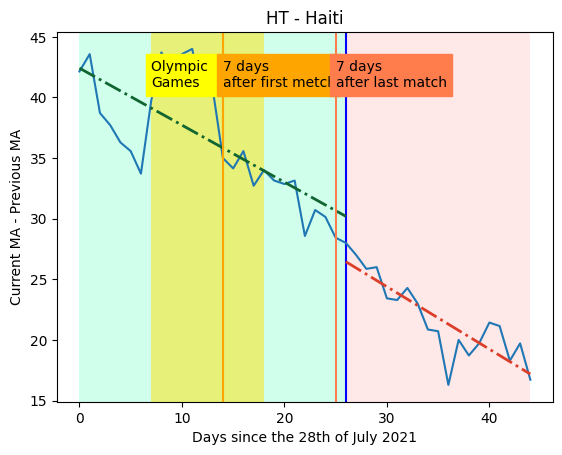

OUT [31]
values [ 38.28571429  41.14285714  41.14285714  41.14285714  46.42857143
  47.57142857  47.57142857  50.71428571  53.71428571  53.71428571
  53.71428571  56.85714286  57.          59.57142857  58.71428571
  55.71428571  55.71428571  55.71428571  54.85714286  54.85714286
  52.71428571  53.71428571  52.          52.          52.
  52.14285714  53.42857143  56.42857143  58.42857143  65.85714286
  65.85714286  65.85714286  70.42857143  71.85714286  76.
  81.28571429  66.42857143  66.42857143  66.42857143  88.14285714
  93.42857143  97.         105.14285714 132.14285714 132.14285714]
 
0.5236 x + 45.01   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]   range(0, 32)   #116530
 
4.644 x - 87.53   [31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(31, 45)   #DB3F29


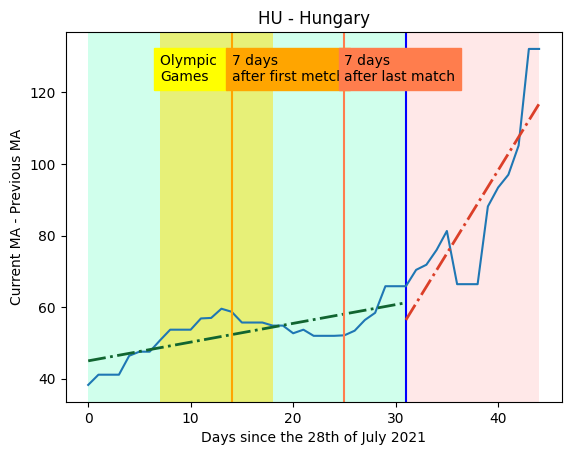

OUT [28]
values [44145.         46413.         48821.28571429 50039.
 49157.57142857 47789.85714286 44826.28571429 43790.85714286
 43086.71428571 42153.         41289.85714286 40428.57142857
 41411.14285714 43413.85714286 42552.42857143 41423.42857143
 40261.71428571 39127.28571429 38295.28571429 36680.57142857
 34977.14285714 33875.         33641.28571429 32851.14285714
 32233.57142857 31991.42857143 31731.57142857 30982.71428571
 29403.42857143 28154.28571429 27703.57142857 26903.28571429
 26428.28571429 24808.28571429 22685.85714286 22306.42857143
 20765.85714286 19072.42857143 17871.71428571 16760.28571429
 16526.71428571 16941.42857143 16205.14285714 15150.
 14193.71428571]
 
-666.3 x + 4.926e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
-1000 x + 5.73e+04   [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(28, 45)   #DB3F29


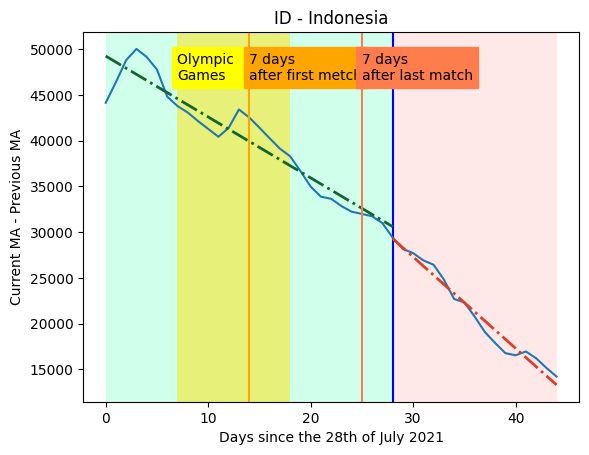

OUT [25]
values [ 573.57142857  602.71428571  668.57142857  745.57142857  859.28571429
  945.42857143 1016.71428571 1091.14285714 1165.85714286 1193.57142857
 1224.42857143 1219.85714286 1212.28571429 1241.57142857 1242.14285714
 1248.         1272.71428571 1289.14285714 1300.85714286 1296.85714286
 1307.71428571 1274.85714286 1262.85714286 1281.57142857 1321.57142857
 1378.85714286 1484.42857143 1492.85714286 1582.14285714 1668.14285714
 1702.57142857 1730.71428571 1765.85714286 1754.57142857 1758.85714286
 1757.         1740.57142857 1752.71428571 1769.85714286 1777.14285714
 1767.14285714 1788.42857143 1799.14285714 1848.71428571 1855.57142857]
 
28.11 x + 777.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]   range(0, 26)   #116530
 
18.38 x + 1075   [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(25, 45)   #DB3F29


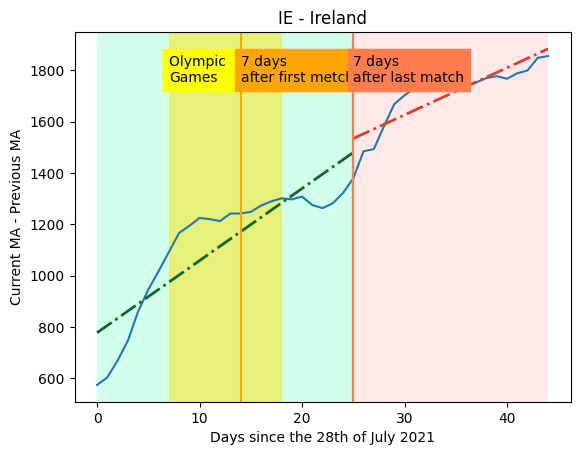

OUT [26]
values [ 574.          633.28571429  720.          746.          802.42857143
  894.57142857  989.71428571 1078.14285714 1135.14285714 1176.57142857
 1252.         1339.85714286 1442.57142857 1570.14285714 1686.42857143
 1813.57142857 1961.         2122.71428571 2218.71428571 2465.42857143
 2608.57142857 2794.85714286 3038.57142857 3240.57142857 3359.28571429
 3547.85714286 3907.57142857 4271.57142857 4631.14285714 4954.42857143
 5252.57142857 5437.85714286 5687.85714286 6032.71428571 6337.14285714
 6624.28571429 6865.71428571 7141.14285714 7310.         7509.57142857
 7697.85714286 7997.         8169.57142857 8353.         8466.42857143]
 
117.3 x + 272.3   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]   range(0, 27)   #116530
 
254.1 x - 2438   [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(26, 45)   #DB3F29


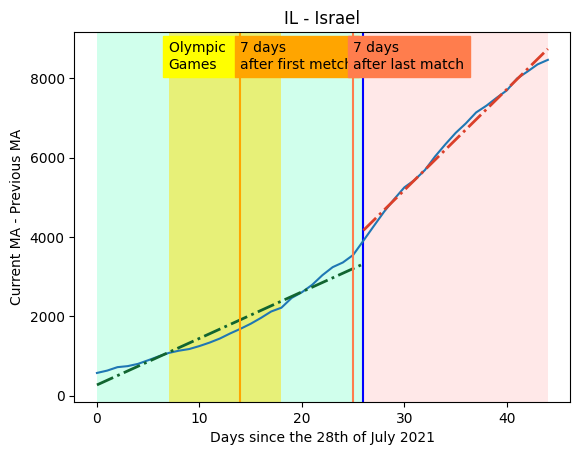

OUT [31]
values [ 18.57142857  27.85714286  37.          73.14285714 104.
 135.57142857 174.42857143 200.57142857 231.71428571 250.85714286
 225.14285714 215.         204.28571429 180.42857143 162.71428571
 146.71428571 134.85714286 136.         126.57142857 116.57142857
 113.57142857 117.28571429 104.14285714 100.14285714  99.42857143
  97.14285714  95.85714286  89.28571429  79.85714286  78.28571429
  74.28571429  69.14285714  65.42857143  59.85714286  58.14285714
  59.          55.42857143  52.42857143  51.14285714  50.85714286
  51.          50.85714286  46.85714286  46.85714286  46.42857143]
 
-1.071 x + 143.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]   range(0, 32)   #116530
 
-1.588 x + 114.1   [31 32 33 34 35 36 37 38 39 40 41 42 43 44]   range(31, 45)   #DB3F29


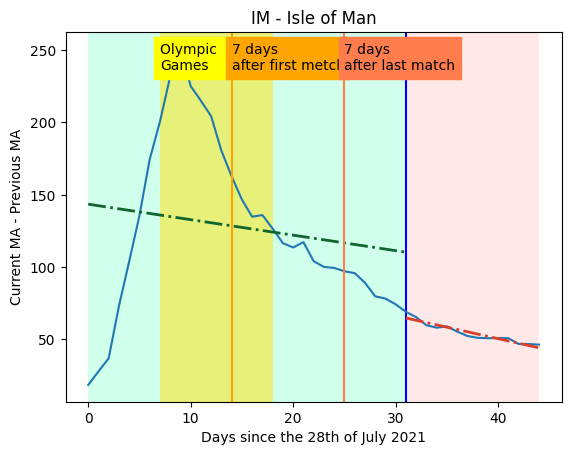

OUT [38]
values [39760.42857143 39125.57142857 38456.         38406.14285714
 38550.42857143 38148.57142857 38609.         38548.57142857
 38033.28571429 38178.71428571 37976.57142857 38147.57142857
 38089.85714286 38324.         38627.71428571 39897.42857143
 40262.         40560.42857143 40670.85714286 40793.71428571
 40646.71428571 40571.42857143 40630.42857143 40198.85714286
 39804.42857143 39142.28571429 38807.28571429 38197.
 37941.71428571 37295.57142857 37301.14285714 36874.42857143
 36508.42857143 36074.42857143 35620.85714286 34936.
 34429.         33827.57142857 33094.         31970.42857143
 32013.42857143 32358.42857143 33753.14285714 34908.42857143
 36665.85714286]
 
-79.85 x + 3.984e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(0, 39)   #116530
 
654.7 x + 6695   [38 39 40 41 42 43 44]   range(38, 45)   #DB3F29


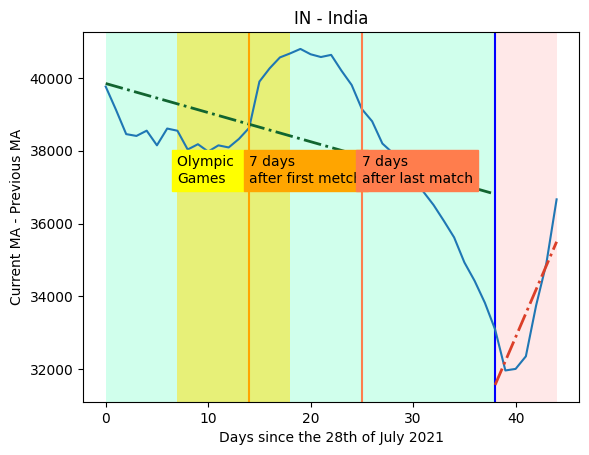

OUT [36]
values [ 8584.57142857  8605.71428571  8562.85714286  8752.57142857
  8907.14285714  9012.          8994.28571429  8806.42857143
  8630.57142857  8711.85714286  8641.          8705.14285714
  9033.28571429  9499.42857143 10241.57142857 10977.71428571
 11505.14285714 11871.14285714 11906.42857143 11985.57142857
 11908.28571429 11793.71428571 11595.42857143 11429.42857143
 11109.14285714 10959.42857143 10514.42857143 10275.28571429
  9692.71428571  9460.14285714  9250.42857143  9198.57142857
  9007.85714286  8895.14285714  8724.85714286  8633.
  8314.28571429  7764.85714286  7243.14285714  7046.42857143
  6806.57142857  6648.28571429  6619.          6629.28571429
  6783.71428571]


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [19]:
#Change point detection with Bayesian Offline

BayesOffline = c.BayesOffline()
media_changepoint = 0.0
count_changepoint = 0.0
min_changepoint = (999,"error")
max_changepoint = (-1,"error")
save_me = []
tabella = pd.DataFrame(columns=['State','FirstSlope','SecondSlope','when'])

for code in all_iso_codes:    
    # Out is a list of possible changepoint "indices"
    values = dataframe.loc[code]['moving_average_new_cases'].values

    prob = 0.9
    out = []
    plot_out = []
    
    while len(out) == 0:
        prob = prob * 0.9
        out = BayesOffline.find_changepoints(values, prob_threshold=prob)
    
    #print("OUT", out, 'VALUES', values)
    
    for i in out:
        media_changepoint += i
        count_changepoint += 1
        #find minimum and maximum of the changepoints with their state
        if i < min_changepoint[0]:
            min_changepoint = (i,code)
        if i > max_changepoint[0]:
            max_changepoint = (i,code)
        save_me.append((i,code))
    
    try:
        if len(out) == 1:
            i = out[0]
            zed = np.polyfit(range(0,i), values[:i], 1)
            p = np.poly1d(zed)
            zed2 = np.polyfit(range(i,len(values)), values[i:], 1)
            p2 = np.poly1d(zed2)
            plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,len(values)),range(i,len(values)),"#DB3F29"]]
            entry = pd.DataFrame.from_dict({"State": [code],'FirstSlope': [zed[0]],'SecondSlope': [zed2[0]],'when': [out[0]]})
        else:
            #plot three trends from two changepoints
            i = out[0]
            j = out[1]
            zed = np.polyfit(range(0,i), values[:i], 1)
            p = np.poly1d(zed)
            zed2 = np.polyfit(range(i,j), values[i:j], 1)
            p2 = np.poly1d(zed2)
            zed3 = np.polyfit(range(j,len(values)), values[j:], 1)
            p3 = np.poly1d(zed3)
            plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,j+1),range(i,j+1),"#D7A449"],[p3,np.arange(j,len(values)),range(j,len(values)),"#DB3F29"]]
            entry = pd.DataFrame.from_dict({"State": [code],'FirstSlope': [round_half_up(zed[0])],'SecondSlope': [round_half_up(zed2[0])],'ThirdSlope': [zed3[0]]})
    except:
        print("Error in ", code)
        continue
    # Plot the data.
    for i in out:
        plt.axvline(x = i, color = 'blue', label = 'changepoint')
        
    c.plot_changepoints(values, out, segment_alpha=0.3,segment_colors=['#66ffc2', '#ffb3b3'])
    #c.plot_changepoints(values, out, segment_alpha=0.3)

    lw = 2
    tabella = pd.concat([tabella, entry], ignore_index=True)
    for p in plot_out:
        print(p[0]," ", p[1], " ", p[2], " ", p[3])
        plt.plot(p[1], p[0](p[2]), color=p[3], linewidth=lw, linestyle="dashdot")
    
    
    # Crea un plot con i punti di cambio colorati
    plt.title(code + " - " + dataframe.loc[code]['Country'].unique()[0])
    plt.axvline(x = difference.days+7, color = 'orange', label = '7 days after first game of olympic games')
    plt.axvline(x = difference.days+18, color = '#FF7D4D', label = '7 days after last game of olympic games')
    plt.xlabel("Days since the 28th of July 2021")
    plt.ylabel("Current MA - Previous MA")
    #plt.legend()
    plt.axvspan(difference.days, difference.days+11, facecolor='#ffe206', alpha=0.5)
    ymax = plt.ylim()[1]
    plt.text(difference.days, ymax*0.9, "Olympic \nGames", rotation=0, color="black", backgroundcolor="yellow")
    plt.text(difference.days+7, ymax*0.9, "7 days \nafter first metch", rotation=0, backgroundcolor="orange")
    plt.text(difference.days+18, ymax*0.9, "7 days \nafter last match", rotation=0, backgroundcolor="#FF7D4D")
    
    #save the plot as a png file
    plt.savefig("./pictures/"+ code + "_changepoint" +".png")
    plt.show()

print("Media: " + str(media_changepoint/count_changepoint))
print("Count: " + str(count_changepoint))
print("Difference: " + str(difference.days))
print("Minimum: " + str(min_changepoint))
print("Maximum: " + str(max_changepoint))
